# Tutorial

The following pages show an example analysis with emgfit broken down into the essential steps. Many of the more advanced features of emgfit are left out or only briefly mentioned in passing, so feel free to explore the documentation further!  

This tutorial was created in the Jupyter Notebook `emgfit_tutorial.ipynb` which can be found in the `emgfit/emgfit/examples/tutorial/` directory of the emgfit distribution. Feel free to copy the tutorial folder to a different directory (outside of the `emgfit/` directory!) and follow along with the tutorial by actually running the code. You can also use this notebook as a template for your own analyses (consider removing some of the explanations). It is recommended to use a separate notebook for each spectrum to be fitted. This enables you to go back to the notebook at any time and check on all the details of how the fits were performed. 

emgfit is optimized to be run within Jupyter Notebooks. There is dozens of decent introductions to using Jupyter Notebooks, a nice overview can e.g. be found at https://realpython.com/jupyter-notebook-introduction/. Naturally, the first step of an analysis with emgfit is starting up your notebook server by running ``jupyter notebook`` in your command-line interface. This should automatically make the Jupyter interface pop up in a browser window. From there you can navigate to different directories and create a new notebook (`new` panel on the top right) or open an existing notebook (.ipynb files).

## Import the package
Assuming you have setup emgfit following the [installation instructions](installation.rst), the first step after launching your Jupyter Notebook will be importing the emgfit package:

In [1]:
### Import fit package 
import emgfit as emg

## How to access the documentation 
Before we actually start processing a spectrum it is important to know how to get access to emgfit's documentation. There is multiple options for this:

1. The **html documentation** can be viewed in any browser. It contains usage examples, detailed explanations of the crucial components and API docs with the different modules and all their methods. The search option and cross references enable quick and easy browsing for help.
2. Once you have imported emgfit you can **access the docs directly from the Jupyter Notebook**:
    * print all available methods of e.g. the spectrum class by running `dir(emg.spectrum)` 
    * print documentation of a method using `help()`, e.g. the docs of the `add_peak` method are printed by running `help(emg.spectrum.add_peak)` in a code cell
    * keyboard shortcuts can be even more convenient:
        * Use `TAB` to get suggestions for auto-completion of method and variable names
        * Place the cursor inside the brackets of a function/method and press `SHIFT` + `TAB` to have a window with the     function/method documention pop up
        * Pressing the `H` key inside a Jupyter Notebook shows you all available keyboard shortcuts)

## Import data 
The following code imports the mass data and creates an emgfit spectrum object called `spec`. The input file must be a TXT or CSV-file following the format of MAc's hist export mode. From here on the analysis of the spectrum proceeds by calling the various methods on our spectrum object `spec`.

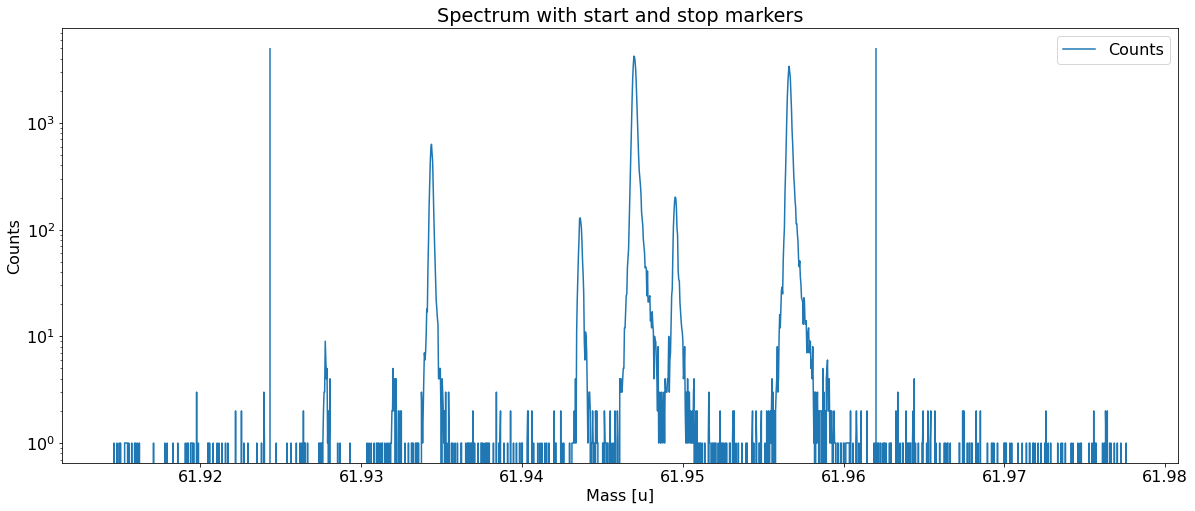

In [2]:
### Import mass data, plot full spectrum and indicate chosen fit range
filename = "2019-09-13_004-_006 SUMMED High stats 62Ga"
skiprows = 38 # number of header rows to skip upon data import
m_start = 61.9243 # low-mass cut off
m_stop = 61.962 # high-mass cut off

spec = emg.spectrum(filename+'.txt',m_start,m_stop,skiprows=skiprows)

## Add peaks to the spectrum 
This can be done with the automatic peak detection spectrum method) and/or by manually adding peaks ([add_peak](modules.rst#emgfit.spectrum.spectrum.add_peak) spectrum method). The plots shown below are (optional) outputs of the  [detect_peaks](modules.rst#emgfit.spectrum.spectrum.detect_peaks) method and depicts the different stages of the automatic peak detection.

All information about the peaks associated with the spectrum are compiled in the peak properties table. The table's left-most column shows the respective peak indeces. In all fits, the peaks' `x_pos` will be used as the initial values for the peak centroid parameters `mu` (to be exact: `mu` marks the centroid of the underlying Gaussians). 

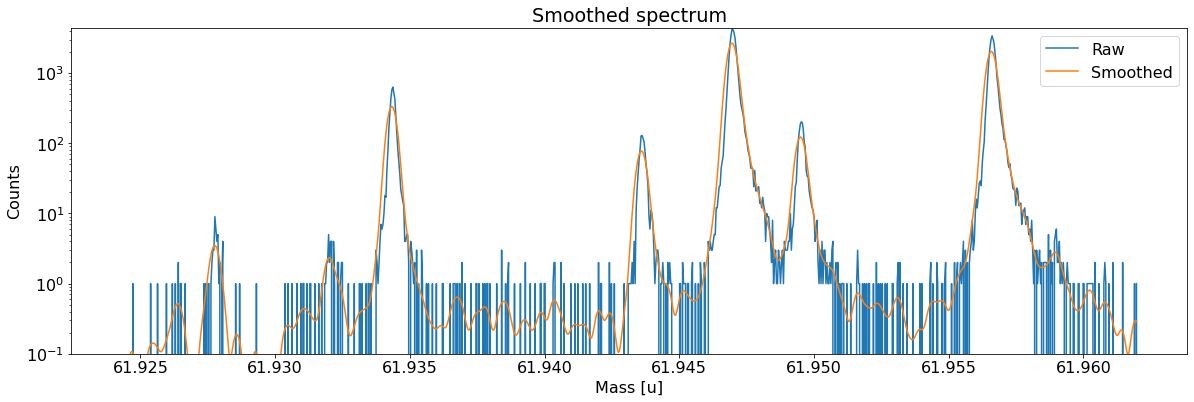

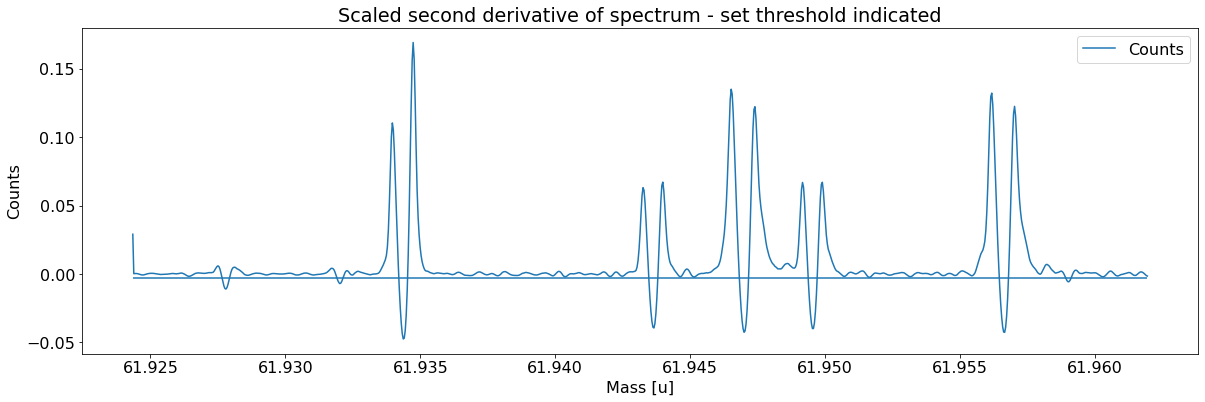

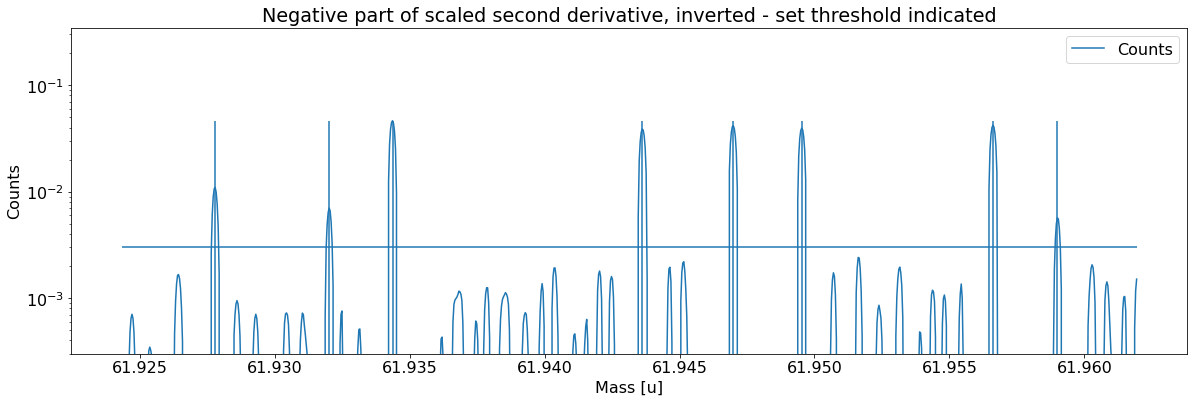

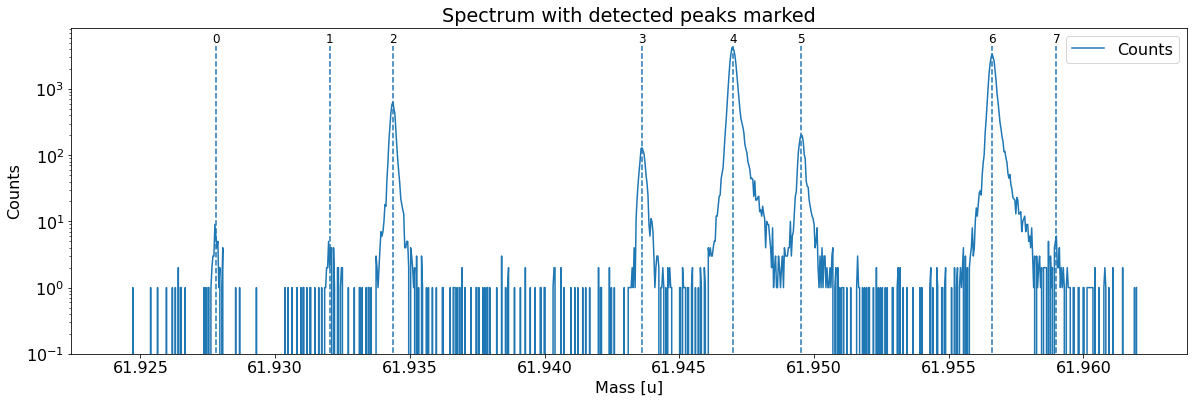

Peak properties table after peak detection:


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,61.932021,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,61.934369,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,61.943618,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,61.946994,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,61.949527,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,61.956611,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,61.958997,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [3]:
### Detect peaks and add them to spectrum object 'spec'
spec.detect_peaks() # automatic peak detection
#spec.add_peak(61.925,species='?') # manually add a peak at x_pos = 61.925u
#spec.remove_peak(peak_index=0) # manually remove the peak with index 0 

## Assign identified species to the peaks (optional)
Although this step is optional, it is highly recommended that it is not skipped. By assigning species labels to your peaks you do not only gain more overview over your spectrum, but also allow for literature values to be automatically fetched from the AME database and entered into the peak properties table. Once a `species` label has been assigned, you can refer to this peak not only via its index but also via the label.

The [assign_species](modules.rst#emgfit.spectrum.spectrum.assign_species) method allows to assign species identifications either to a single selected peak or to all peaks at once. Here the second option was used by passing a list of species labels to [assign_species](modules.rst#emgfit.spectrum.spectrum.assign_species). The list must have the same length as the number of peaks associated with the spectrum object. If there are peaks whose labels should not be changed (e.g. unidentified peaks), simply insert ``None`` as a placeholder at the corresponding spots (as done for peaks 2 and 7 below). The syntax for species labels follows MAc's :-Notation. **It is important not to forget to subtract the number of electrons corresponding to the ion's charge state!** Otherwise the analysis would mistakenly proceed with the atomic instead of the ionic mass. Note that currently only singly-charged species are supported by emgfit. Tentative peak identifications can be indicated by adding a ``'?'`` to the end of the species string. In this case the literature values are not fetched. The user can also define custom literature values (e.g. to handle isomers or if there are recent measurements that have not entered the AME yet). For more details see the linked documentation of [assign_species](modules.rst#emgfit.spectrum.spectrum.assign_species).   

This is also a good point in time to add any comments to the peaks using the [add_peak_comment](modules.rst#emgfit.spectrum.spectrum.add_peak_comment) method. These comments can be particularly helpful for the post-processing in Excel since they are written into the output file with the fit results (as is the entire peak properties table). More general comments that concern the entire spectrum can instead be added with the [add_spectrum_comment](modules.rst#emgfit.spectrum.spectrum.add_spectrum_comment) method. 

In [4]:
### Assign species and add peak comments
spec.assign_species(['Ni62:-1e','Cu62:-1e?',None,'Ga62:-1e','Ti46:O16:-1e','Sc46:O16:-1e','Ca43:F19:-1e',None])
spec.add_peak_comment('Non-isobaric',peak_index=2)
spec.show_peak_properties() # check the changes by printing the peak properties table

Species of peak 0 assigned as Ni62:-1e
Species of peak 1 assigned as Cu62:-1e?
Species of peak 3 assigned as Ga62:-1e
Species of peak 4 assigned as Ti46:O16:-1e
Species of peak 5 assigned as Sc46:O16:-1e
Species of peak 6 assigned as Ca43:F19:-1e
Comment of peak 2 was changed to:  Non-isobaric


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None
2,61.934369,?,Non-isobaric,NaN,NaN,False,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
4,61.946994,Ti46:O16:-1e,-,61.946993,1.760001e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
6,61.956611,Ca43:F19:-1e,-,61.956621,2.440018e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
7,61.958997,?,-,NaN,NaN,False,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None


## Select the optimal fit model and perform the peak-shape calibration 
Next we need to find both a fit model and a set of model parameters that capture the shape of our peaks as well as possible. In emgfit both of this is achieved with the [determine_peak_shape](modules.rst#emgfit.spectrum.spectrum.determine_peak_shape) method. Once the peak-shape calibration has been performed all subsequent fits will be performed with this fixed peak-shape, by only varying the peak centroids, amplitudes and optionally the uniform-baseline parameter `bkd_c`.

By default [determine_peak_shape](modules.rst#emgfit.spectrum.spectrum.determine_peak_shape) performs an **automatic model selection** in which the shape-calibrant peak is first fitted with a pure Gaussian and then with Hyper-EMG functions with an increasing number of expontential tails on the left and right. The algorithm selects the fit model which yields the smallest $\chi^2_\text{red}$ without having any of the tail weight parameters $\eta$ compatible with zero within their uncertainty. Alternatively, the auto-model selection can be turned off with the argument `vary_tail_order=False` and the fit model can be selected manually with the `fit_model` argument.

Once the best fit model has been selected the method proceeds with the determination of the peak-shape parameters and shows a detailed report with the fit results. 

Some recommendations:

- It is recommended to do the peak-shape calibration with a chi-squared fit (default) since this yields more robust     results and more trusworthy parameter uncertainty estimates. Check the method docs for info on performing the shape calibration with binned maximum likelihood estimation.
- Ideally the peak-shape calibration is performed on a well-separated peak with high statistics. In this example, the `Ca43:F19:-1e` peak was selected as peak-shape calibrant. Since the default fit range includes a smaller peak on the right, the range was manually reduced to 0.45u with the `x_fit_range` argument. If unavoidable, the peak-shape determination can also be performed on partially overlapping peaks since emgfit ensures identical shape parameters for all peaks being fitted. 


##### Determine optimal tail order #####


### Fitting data with Gaussian ###---------------------------------------------------------------------------------------------



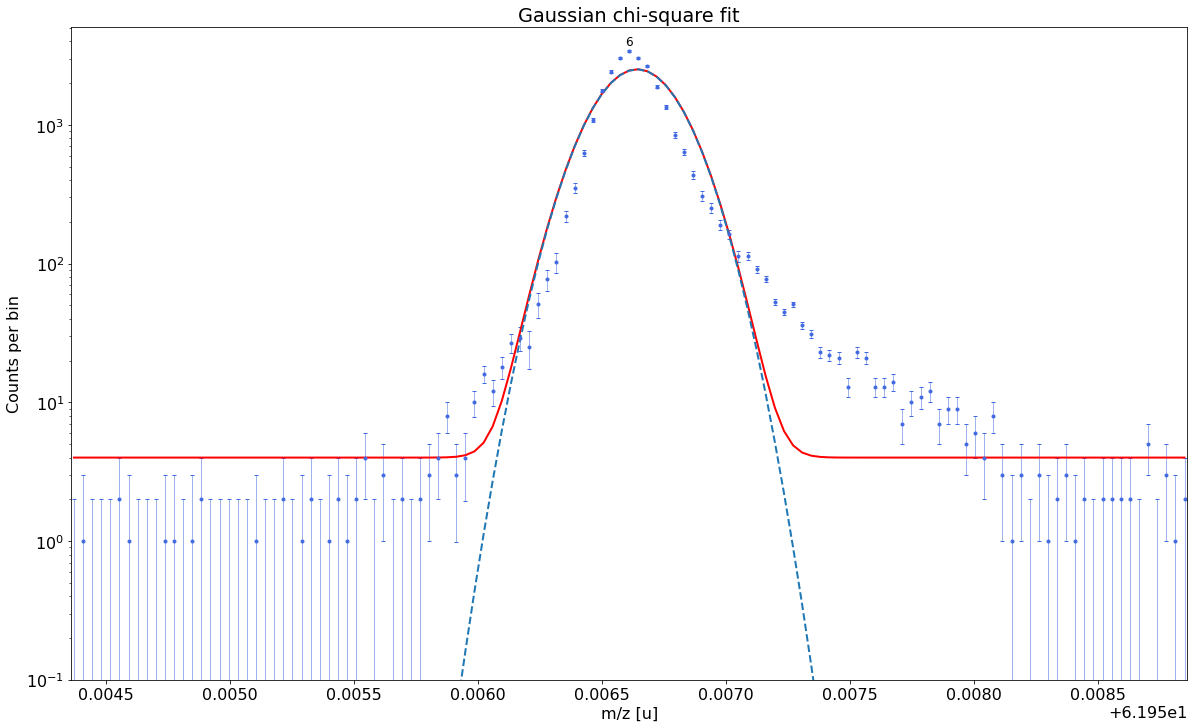

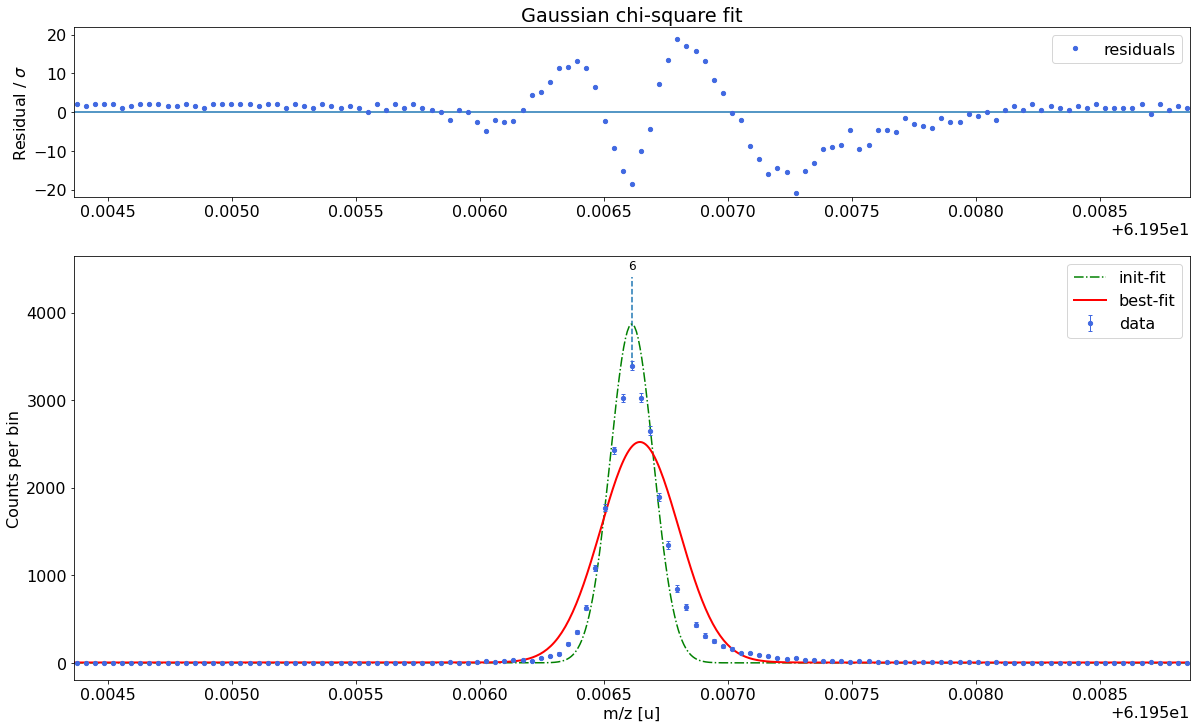


Gaussian-fit yields reduced chi-square of: 45.57 +- 0.13


### Fitting data with emg01 ###---------------------------------------------------------------------------------------------



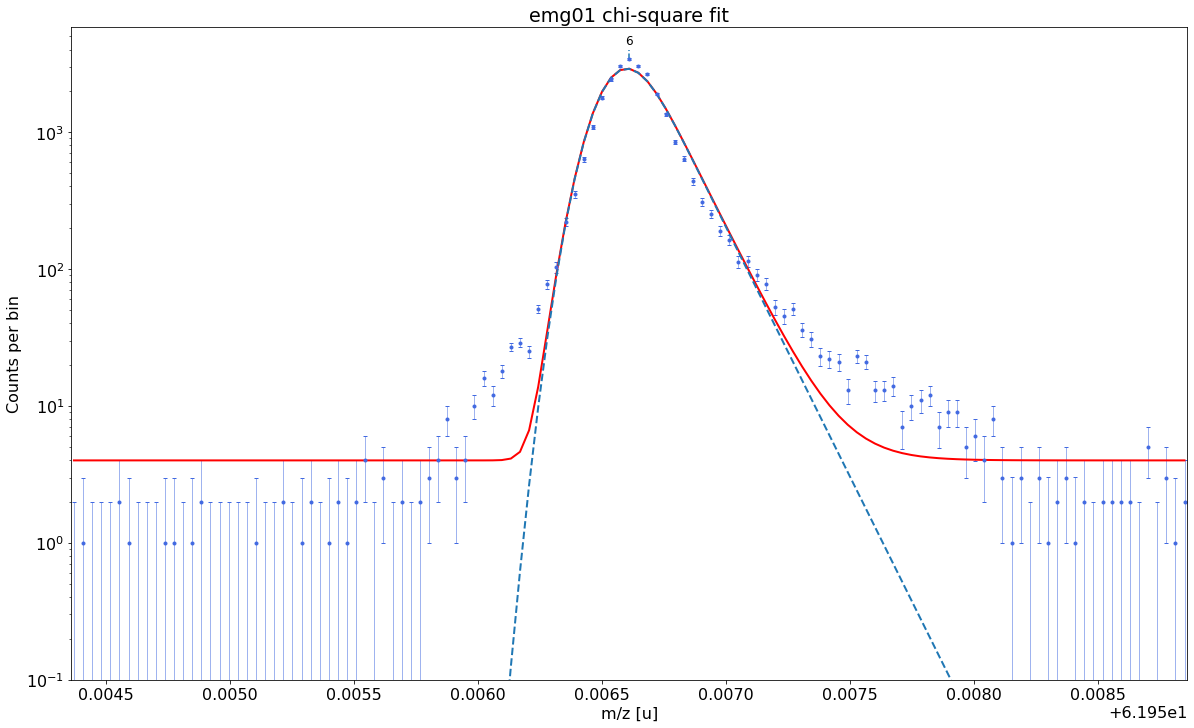

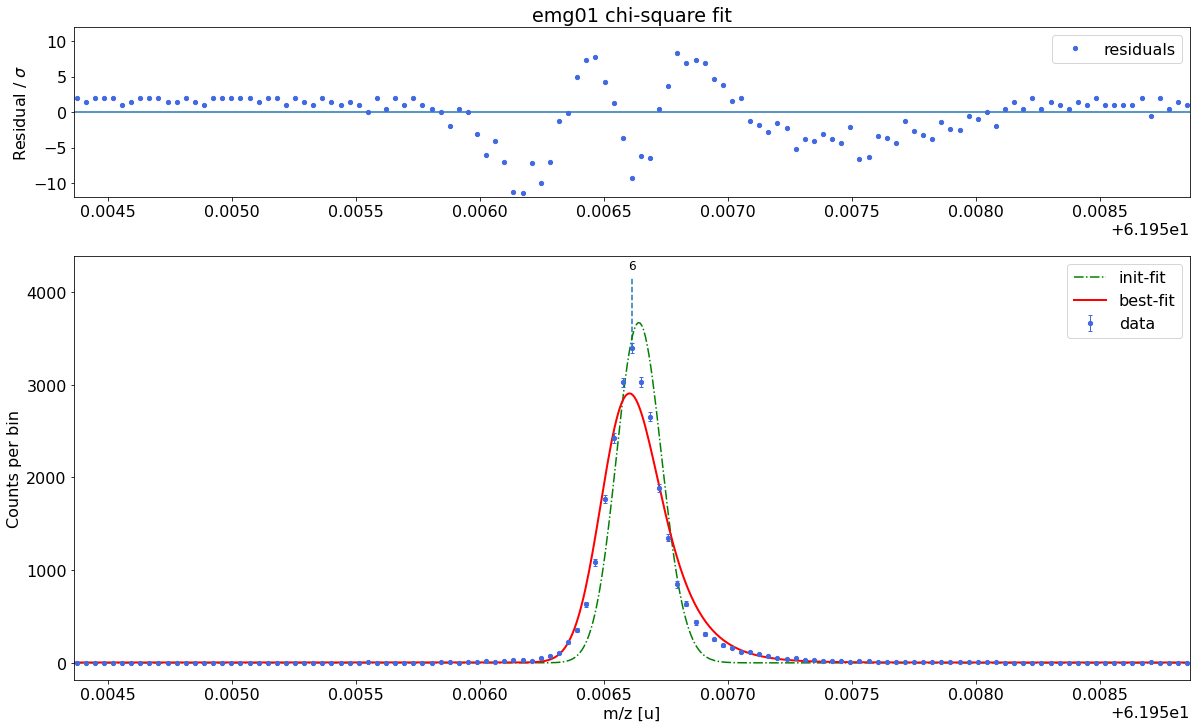


emg01-fit yields reduced chi-square of: 13.79 +- 0.13


### Fitting data with emg10 ###---------------------------------------------------------------------------------------------



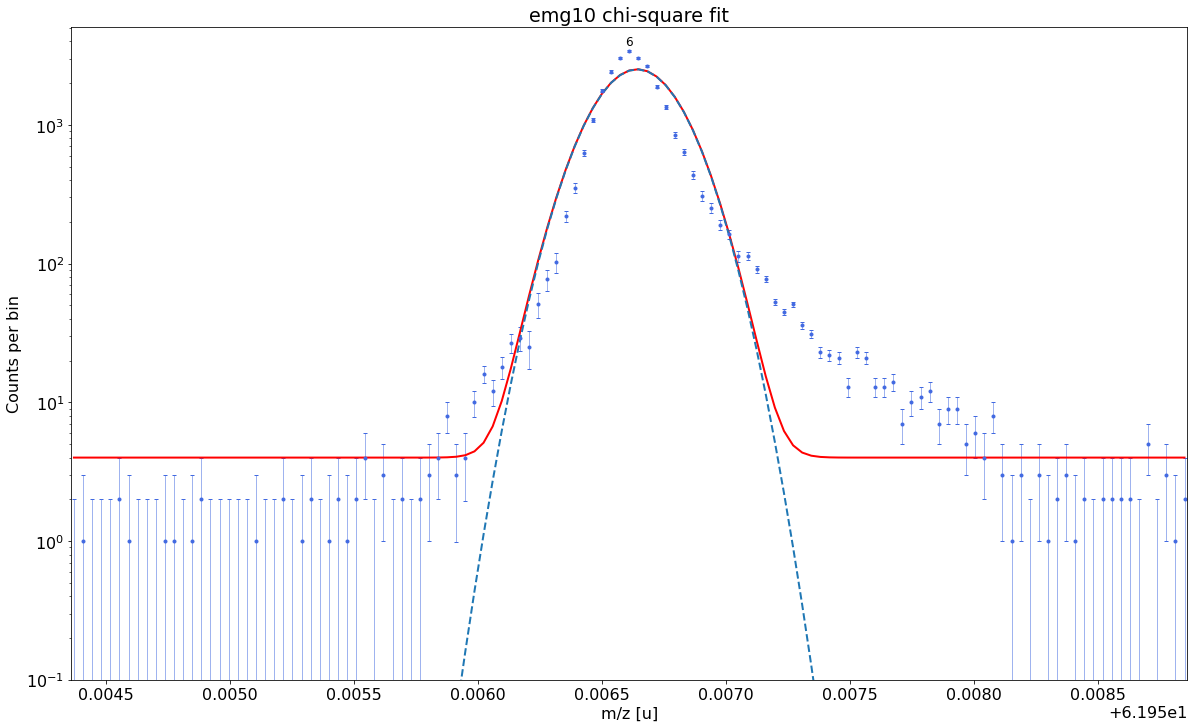

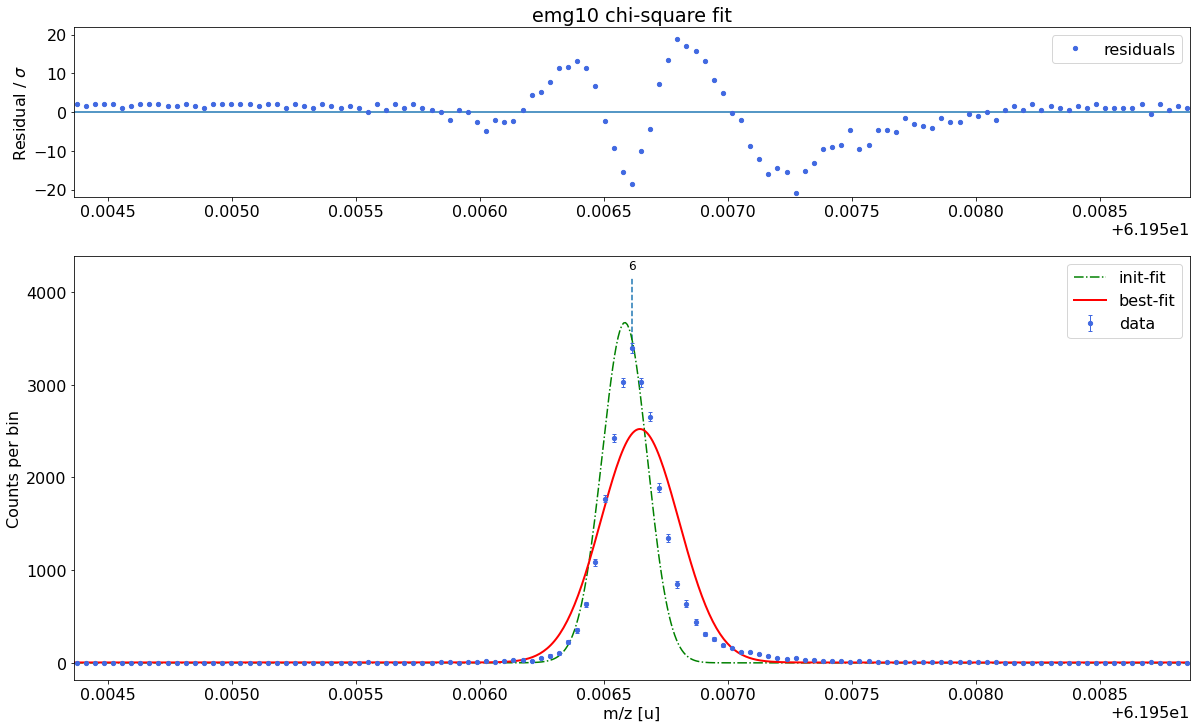


emg10-fit yields reduced chi-square of: 45.96 +- 0.13


### Fitting data with emg11 ###---------------------------------------------------------------------------------------------



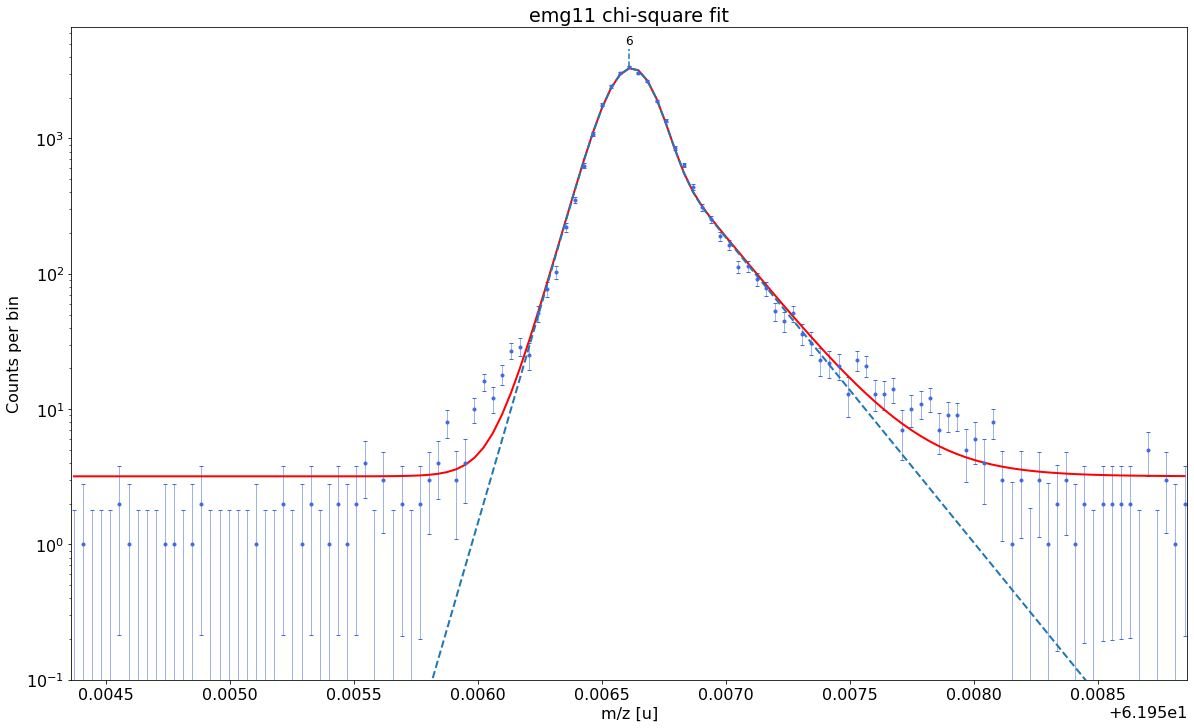

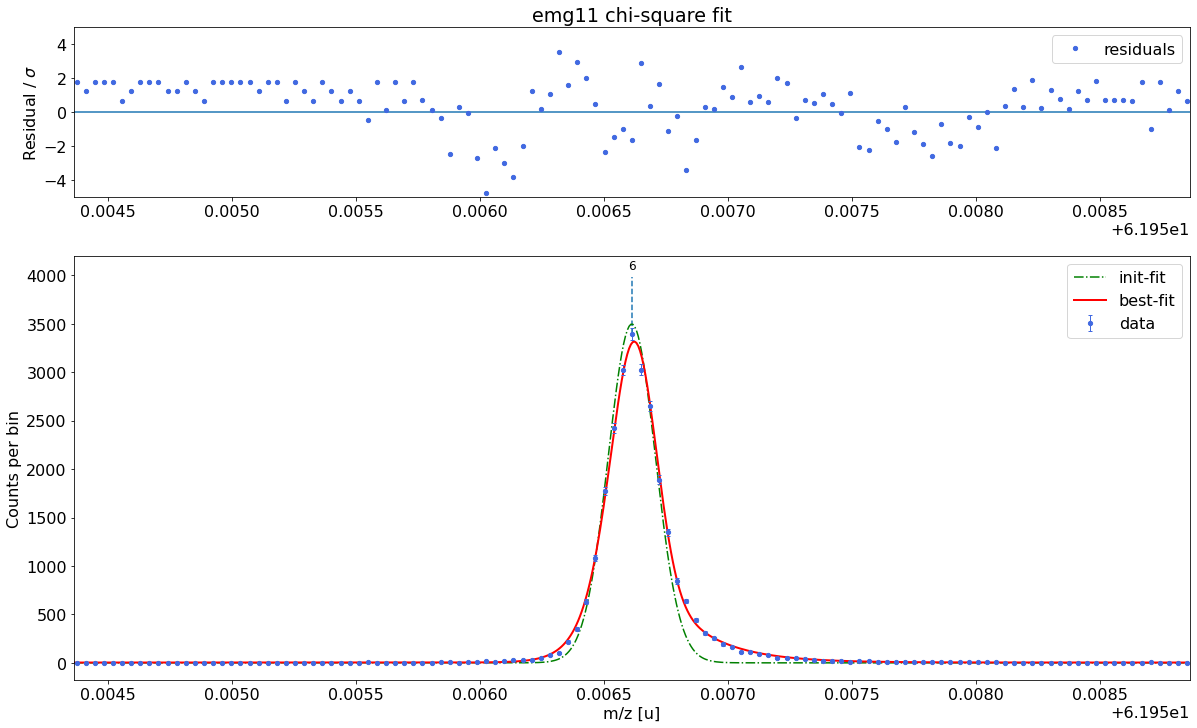


emg11-fit yields reduced chi-square of: 2.6 +- 0.13


### Fitting data with emg12 ###---------------------------------------------------------------------------------------------



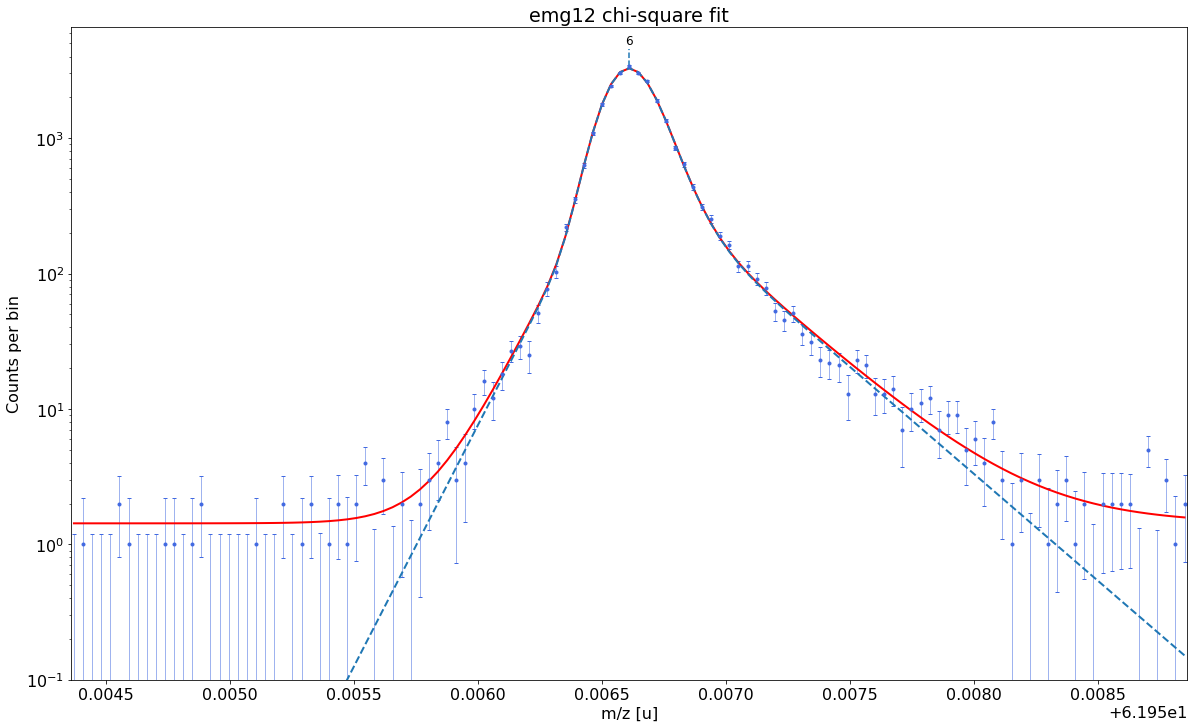

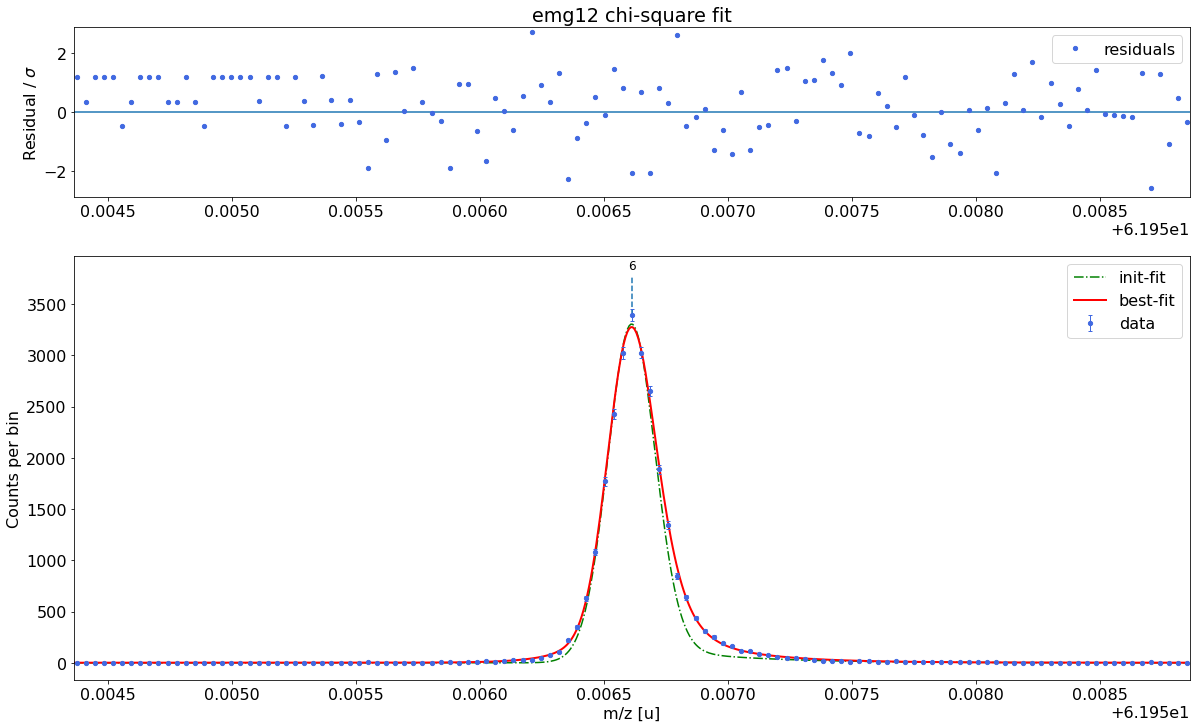


emg12-fit yields reduced chi-square of: 1.22 +- 0.13


### Fitting data with emg21 ###---------------------------------------------------------------------------------------------



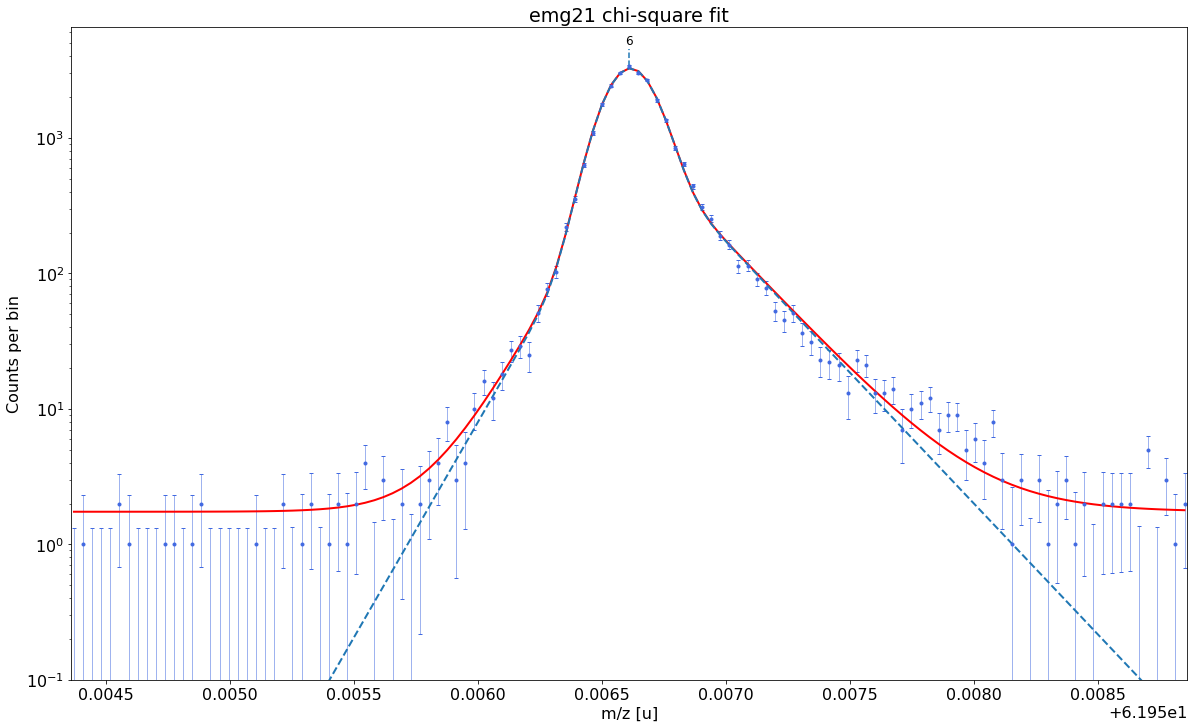

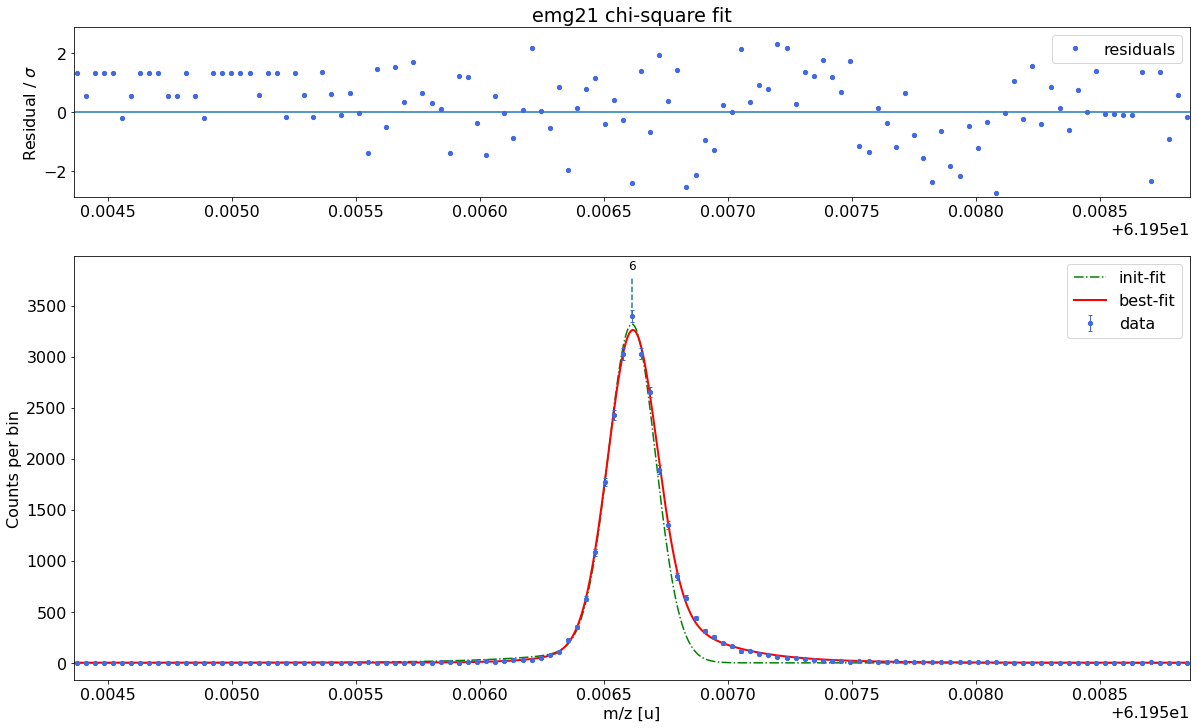

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg21-fit yields reduced chi-square of: 1.47 +- 0.13


### Fitting data with emg22 ###---------------------------------------------------------------------------------------------



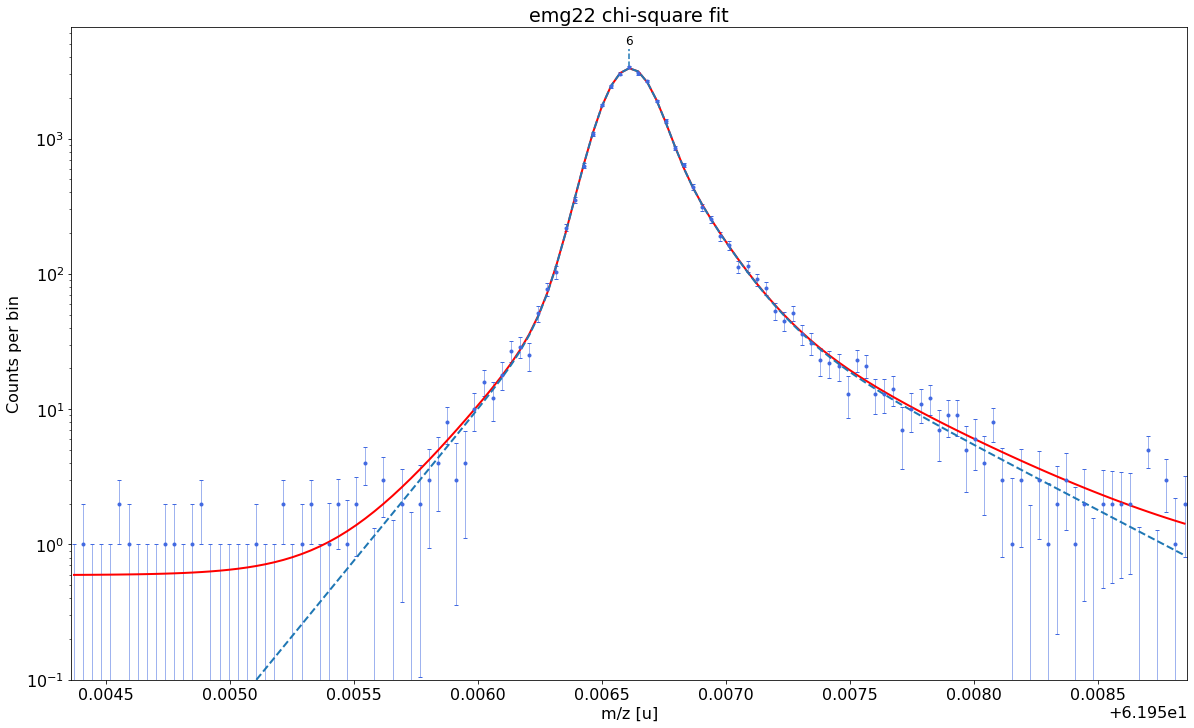

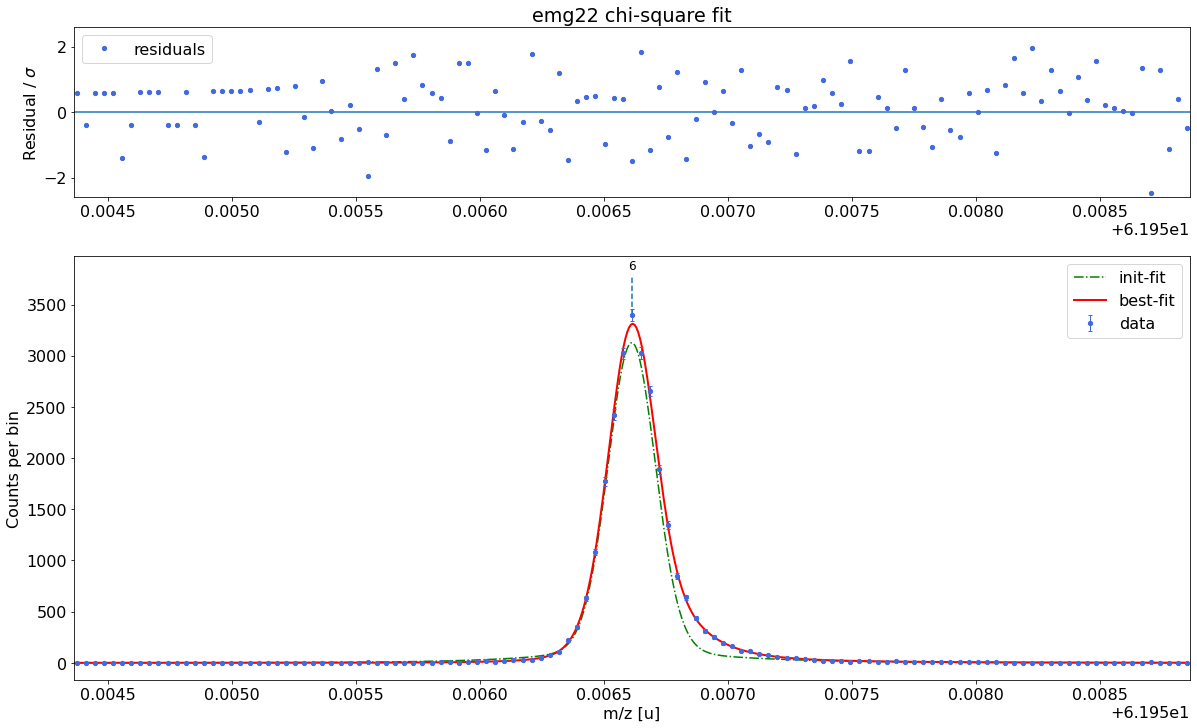


emg22-fit yields reduced chi-square of: 0.93 +- 0.13


### Fitting data with emg23 ###---------------------------------------------------------------------------------------------



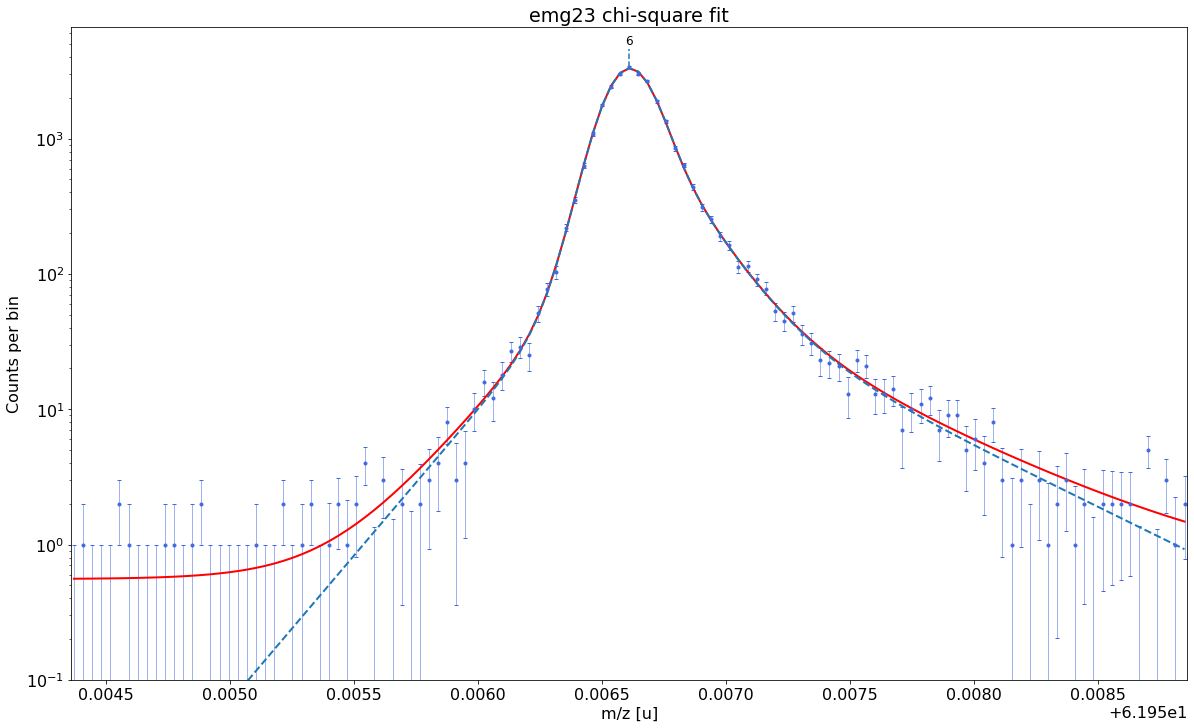

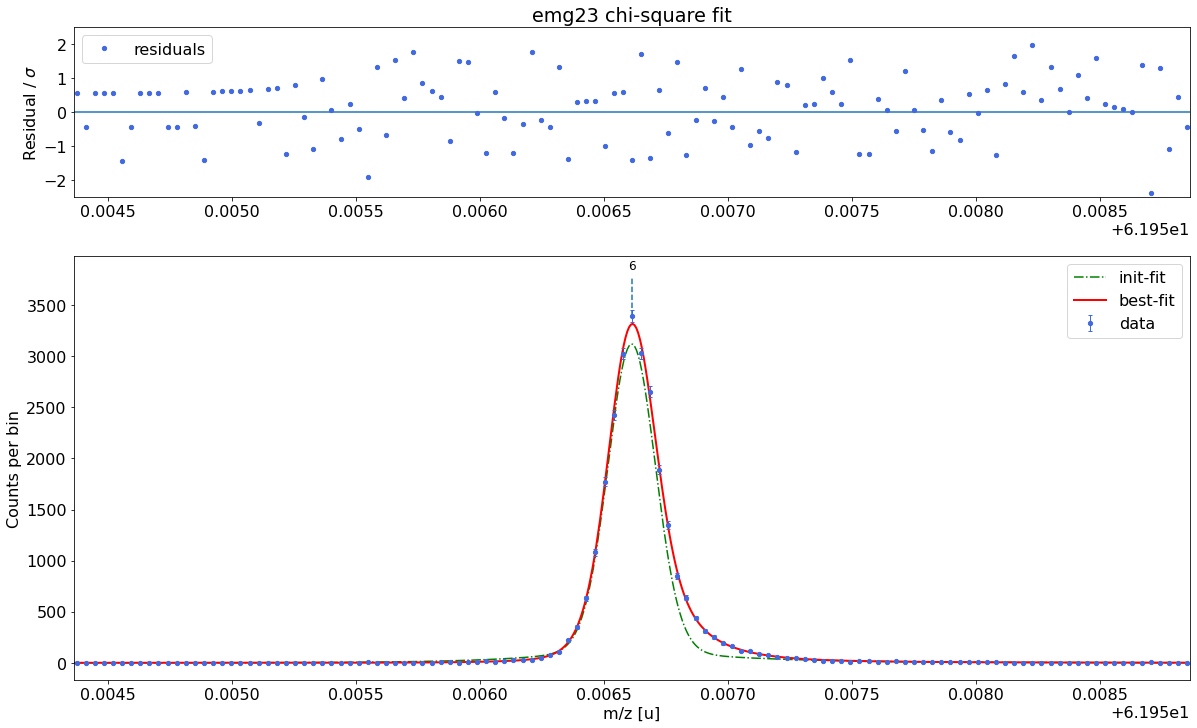

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg23-fit yields reduced chi-square of: 0.94 +- 0.13


### Fitting data with emg32 ###---------------------------------------------------------------------------------------------



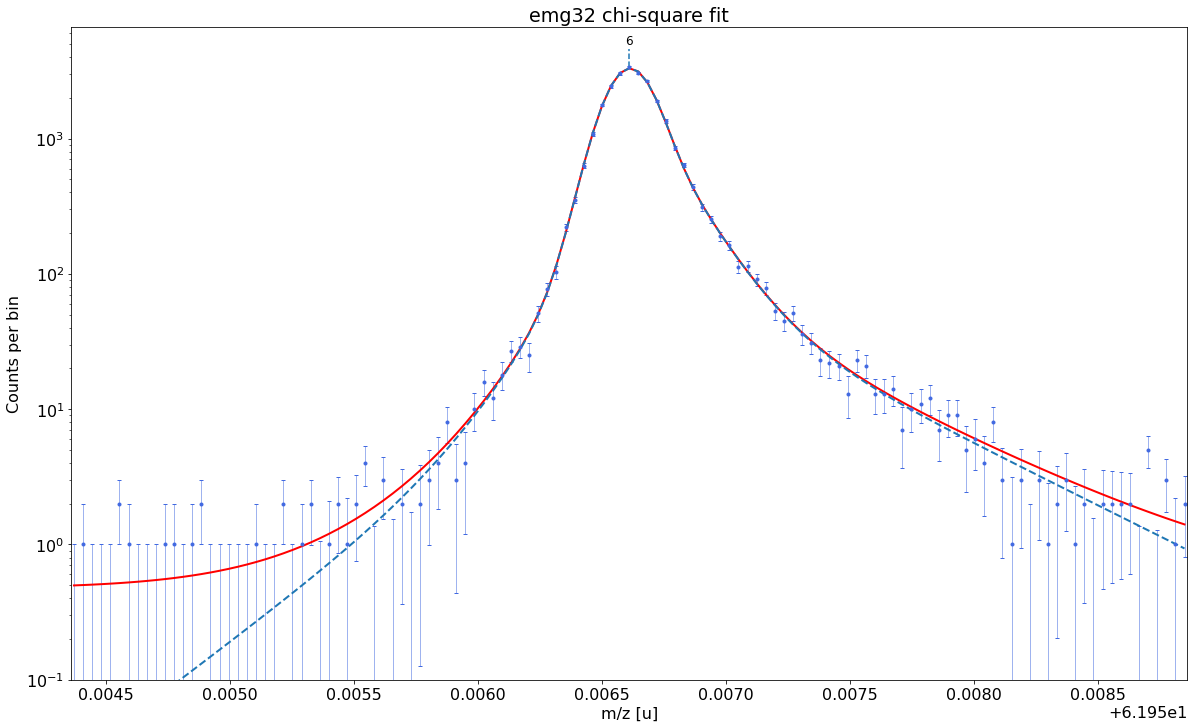

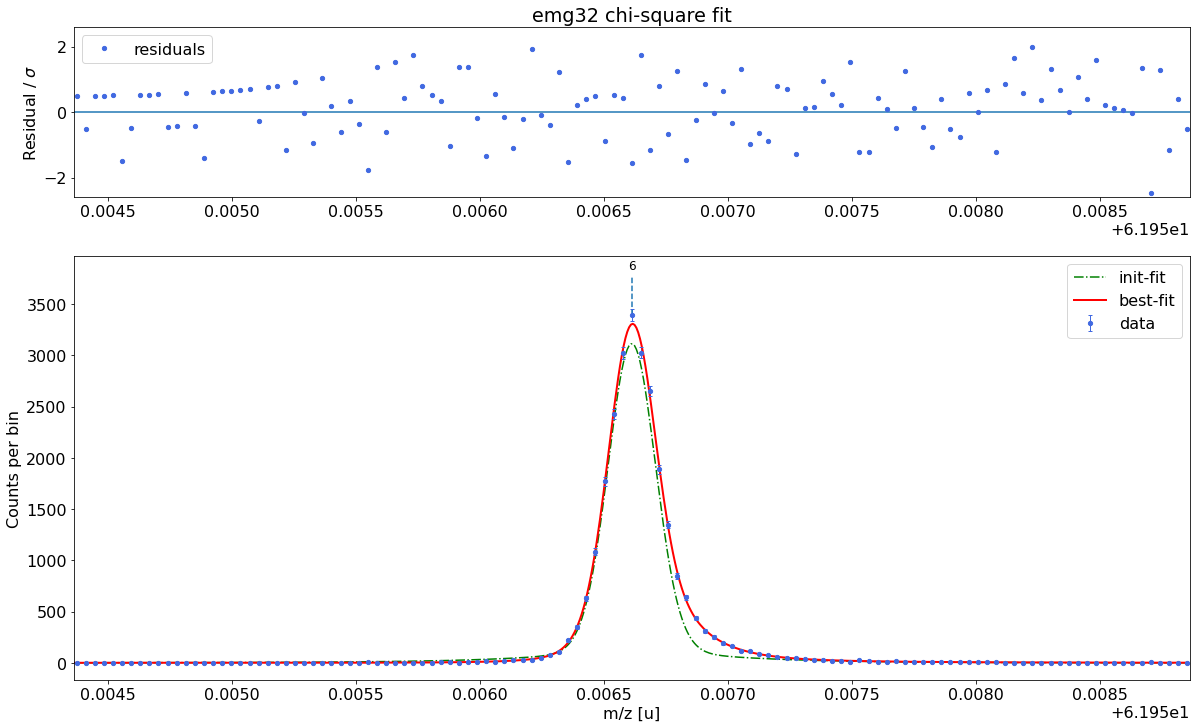

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg32-fit yields reduced chi-square of: 0.94 +- 0.13


### Fitting data with emg33 ###---------------------------------------------------------------------------------------------



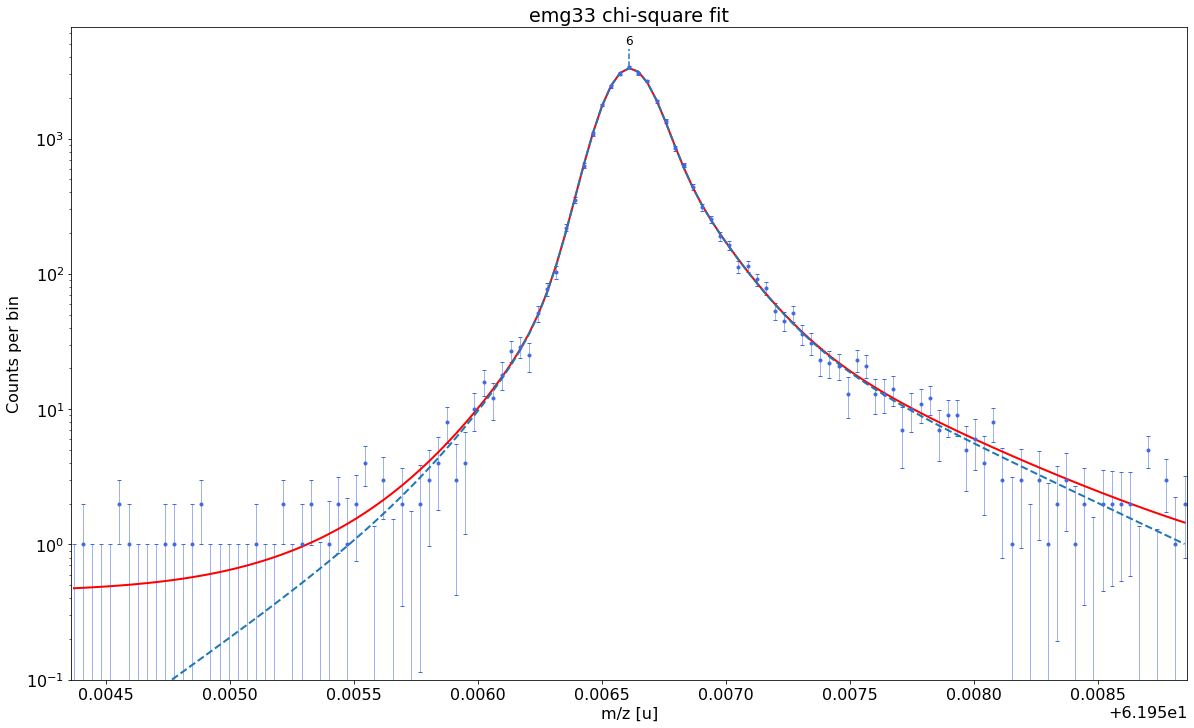

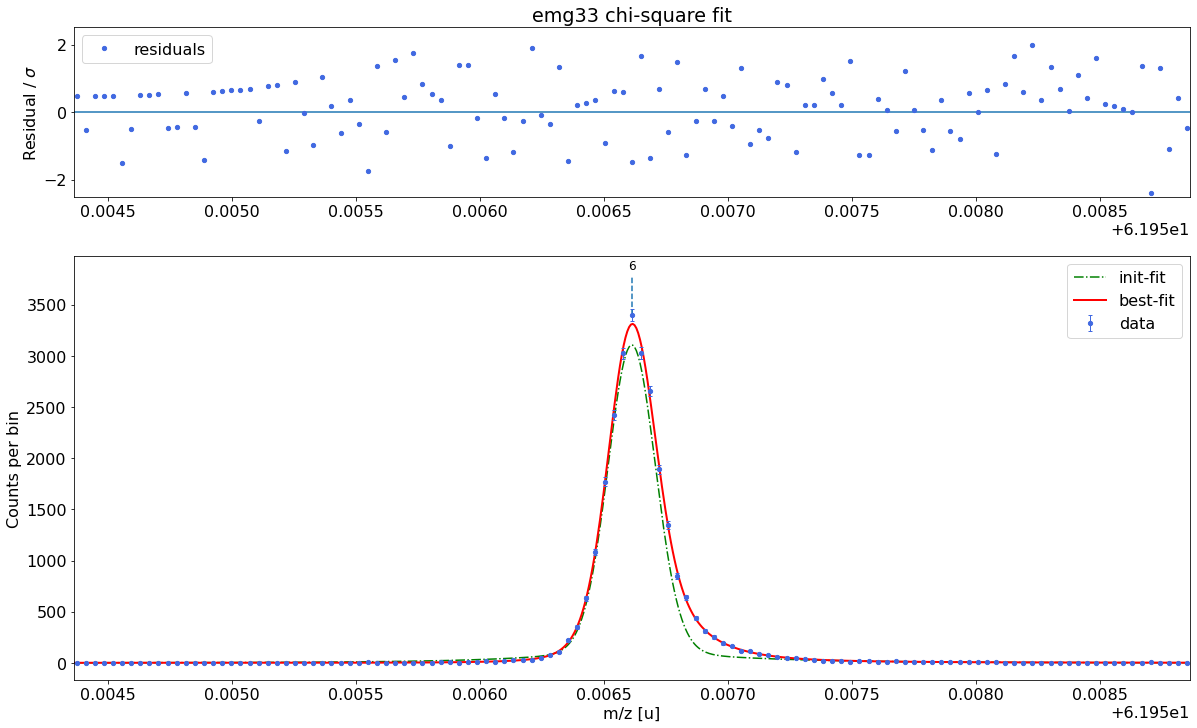

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg33-fit yields reduced chi-square of: 0.96 +- 0.14


##### RESULT OF AUTOMATIC MODEL SELECTION: #####

    Best fit model determined to be: emg22
    Corresponding chi²-reduced: 0.93 


##### Peak-shape determination #####-------------------------------------------------------------------------------------------


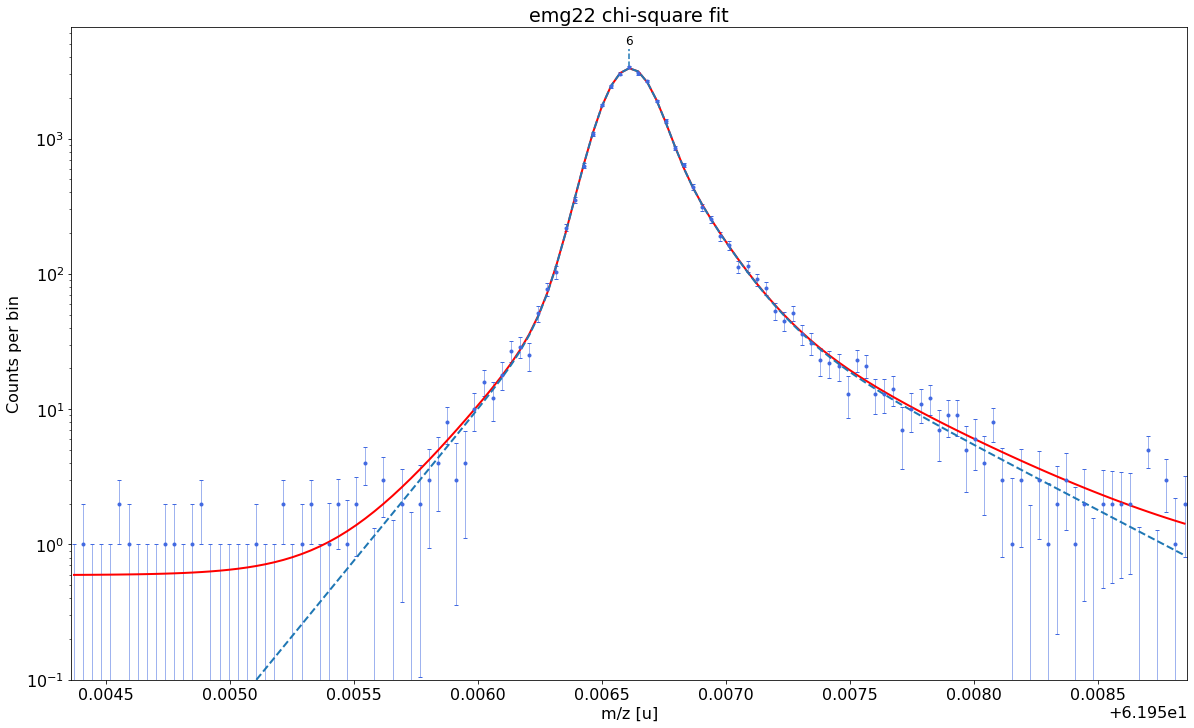

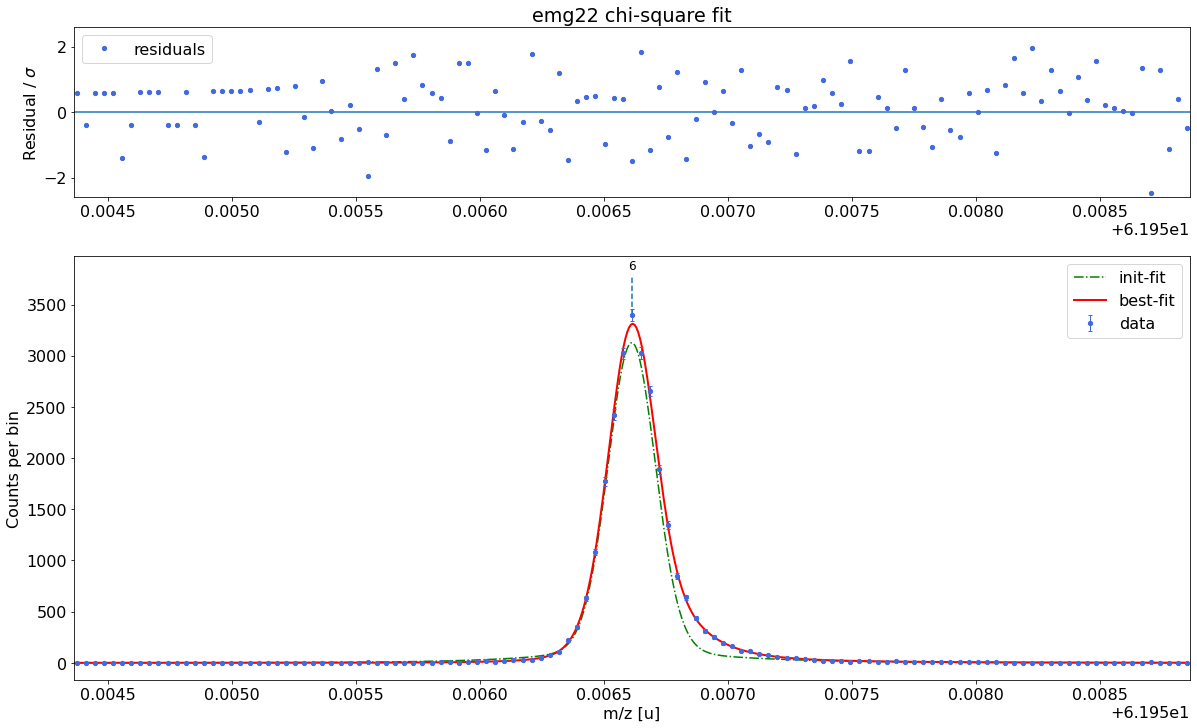

In [5]:
## Peak-shape calibration with default settings, including automatic model selection:
#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e') 

## Peak-shape calibration with user-defined fit range:
spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',x_fit_range=0.0045) 

## Peak-shape calibration with user-defined fit model:
#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',fit_model='emg12',vary_tail_order=False)

## Determine A_stat_emg for subsequent stat. error estimations (optional)

The statistical uncertainties of Hyper-EMG fits are estimated using the equation:

$\sigma_{stat} = A_{stat,emg} \cdot \frac{\mathrm{FWHM}}{\sqrt{N_{counts}}}$

where $\mathrm{FWHM}$ and $N_{counts}$ refer to the full width at half maximum and the number of counts in the respective peak.

By default a of value $A_{stat,emg} = 0.52$ will be used for Hyper-EMG models (for Gaussians $A_{stat,G}=0.425$).

However, $A_{stat,emg}$ depends on the peak-shape and can deviate from the default value. Therefore, the [determine_A_stat_emg](modules.rst#emgfit.spectrum.spectrum.determine_A_stat_emg) method can be used to estimate $A_{stat,emg}$ for the specific peak shape in the spectrum. This is done by fitting many simulated spectra created via bootstrap re-sampling from a reference peak in the spectrum. The reference peak should be well-separated and have decent statistics (e.g. the peak-shape calibrant). For details on how $A_{stat,emg}$ is estimated see the linked docs of [determine_A_stat_emg](modules.rst#emgfit.spectrum.spectrum.determine_A_stat_emg).

This method will typically run for ~10 minutes if `N_spectra=1000` (default) is used. Since this is only for demonstration purposes the number of bootstrapped spectra generated for each data point (`N_spectra` argument) was reduced to 10 to get a quicker run time. This is also the reason for the large scatter of the data points below. 

In practice it is convenient to skip this method for the first processing of the spectrum since this will only affect the statistical uncertainties but no other fit properties. Once reasonable fits have been achieved for all peaks of interest in the cells below, the exact uncertainties can be obtained by returning to this cell to execute [determine_A_stat_emg](modules.rst#emgfit.spectrum.spectrum.determine_A_stat_emg) with a decent value for `N_spectra`  and then re-runnning the cells below (then with the update value for [determine_A_stat_emg](modules.rst#emgfit.spectrum.spectrum.determine_A_stat_emg)). The latter is conveniently done by using the `Run All Below` option in the `Cell` panel of the Jupyter Notebook.

Creating synthetic spectra via bootstrap re-sampling and fitting  them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.



Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 9.6122e-09
    reduced chi-square = 1.3732e-09
    Akaike info crit   = -162.317379
    Bayesian info crit = -162.237937
[[Variables]]
    amplitude:  1.3260e-04 +/- 1.3094e-05 (9.87%) (init = 1)
    exponent:  -0.5 (fixed)


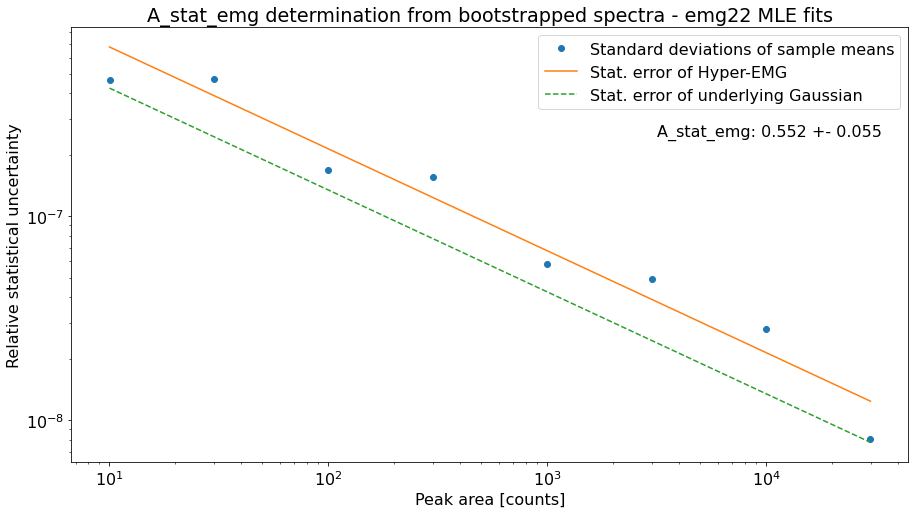

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.552 +- 0.055


In [6]:
# Determine A_stat_emg and save the resulting plot 
spec.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,plot_filename='outputs/'+filename+'_MLE',N_spectra=10) 

## Fit all peaks, perform mass re-calibration & obtain final mass values
The following code fits all peaks in the spectrum, performs the mass (re-)calibration, determines the peak-shape uncertainties and updates the peak properties list with the results including the final mass values and their uncertainties. 

The simultaneous mass recalibration is optional and only invoked when the `species_mass_calib` (or the `index_mass_calib`) argument are specified. If this feature is not used, the [fit_peaks](modules.rst#emgfit.spectrum.spectrum.fit_peaks) method requires a pre-existing mass calibration (see Alternative 1 section below). In contrast to `determine_peak_shape`, by default [fit_peaks](modules.rst#emgfit.spectrum.spectrum.fit_peaks) performs a binned maximum likelihood fit ('MLE'). For chi-square fitting with [fit_peaks](modules.rst#emgfit.spectrum.spectrum.fit_peaks) see Alternative 2 section below. Fits with [fit_peaks](modules.rst#emgfit.spectrum.spectrum.fit_peaks) can be restricted to a user-defined mass range (see the commented-out line of code below). 

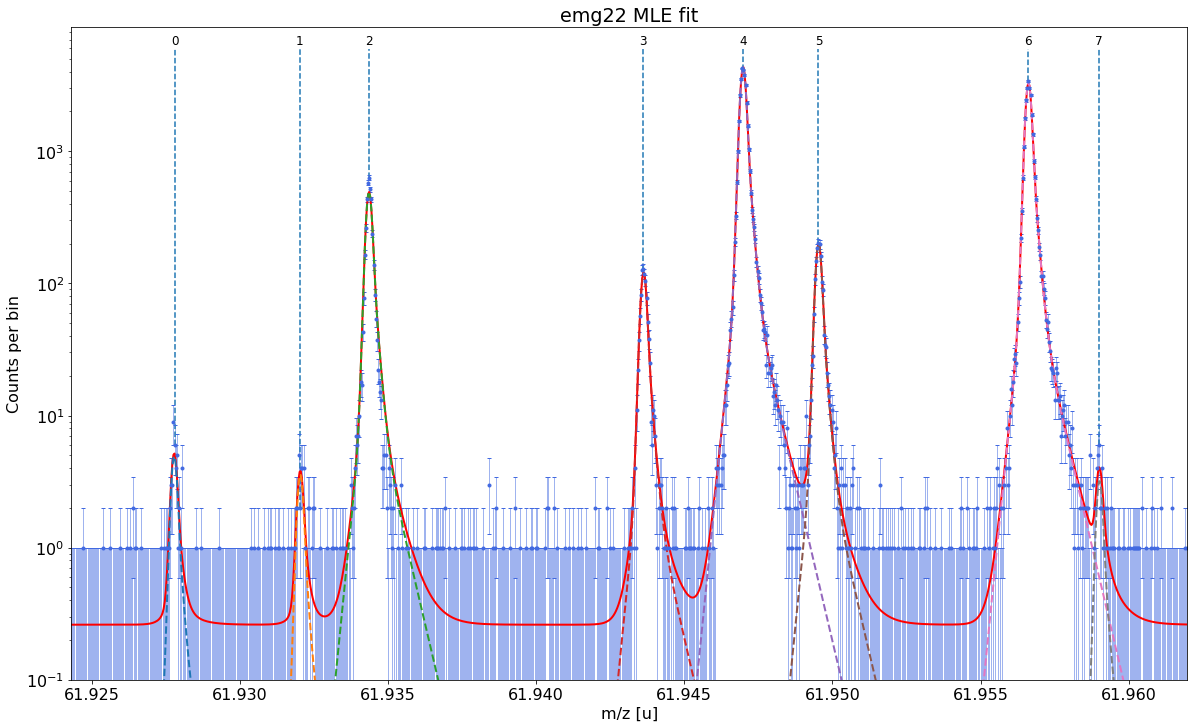

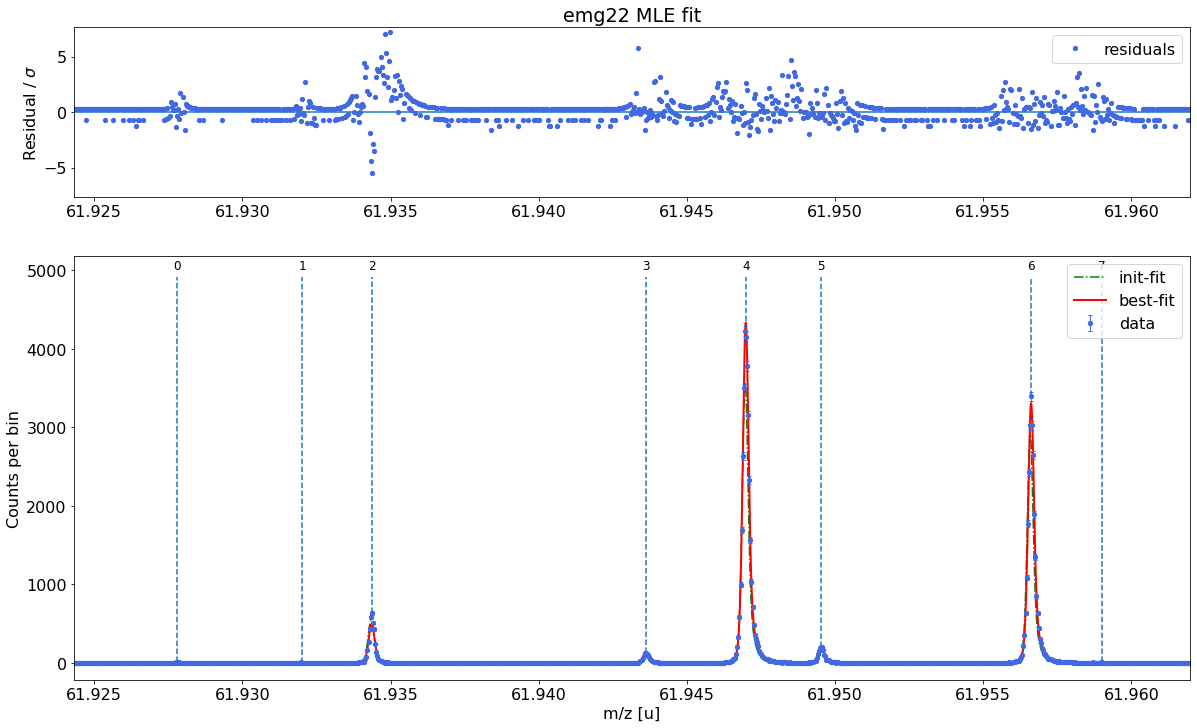


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.2e-08

Recalibration factor:      0.999999689 = 1 -3.11e-07
Relative recalibration error:  1.2e-08 


##### Peak-shape uncertainty evaluation #####

All mass shifts below are corrected for the corresponding shifts of the calibrant peak.

Determining absolute centroid shifts of mass calibrant.



Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 0 by -0.215 /  0.168 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 1 by  0.454 / -0.406 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 2 by -0.387 /  0.217 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 3 by -0.037 /  0.010 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 5 by  0.016 / -0.084 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 6 by  0.036 / -0.018 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 7 by  0.212 / -0.204 μu.



Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 0 by -0.459 /  0.392 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 1 by -0.912 /  0.933 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 2 by -0.443 /  0.224 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 3 by -0.164 /  0.142 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 5 by -0.167 /  0.250 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 6 by -0.096 /  0.068 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 7 by -1.599 /  1.712 μu.



Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 0 by  0.519 / -0.521 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 1 by  0.306 / -0.241 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 2 by  0.212 / -0.433 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 3 by  0.271 / -0.209 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 5 by  0.229 / -0.170 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 6 by  0.070 / -0.064 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 7 by  0.445 / -0.345 μu.



Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 0 by -0.697 /  0.700 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 1 by  0.211 / -0.210 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 2 by -0.516 /  0.354 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 3 by -0.085 /  0.136 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 5 by -0.140 /  0.082 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 6 by -0.046 / -0.036 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 7 by -0.739 /  0.706 μu.



Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 0 by -0.257 /  0.245 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 1 by -0.149 /  0.124 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 2 by -0.269 /  0.027 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 3 by -0.132 /  0.191 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 5 by -0.063 /  0.156 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 6 by -0.044 /  0.052 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 7 by  0.200 / -0.031 μu.



Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 0 by -0.044 / -0.033 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 1 by -0.210 /  0.088 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 2 by -0.166 / -0.038 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 3 by -0.102 /  0.073 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 5 by -0.223 /  0.179 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 6 by  0.027 / -0.012 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 7 by -3.045 /  2.414 μu.



Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 0 by  0.005 / -0.140 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 1 by  0.230 / -0.364 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 2 by  0.175 / -0.513 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 3 by  0.129 / -0.193 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 5 by  0.026 / -0.008 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 6 by -0.023 / -0.001 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 7 by  0.428 / -0.476 μu.



Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 0 by -0.082 /  0.058 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 1 by  0.315 / -0.341 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 2 by  0.009 / -0.035 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 3 by  0.024 / -0.042 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 5 by  0.367 / -0.460 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 6 by -0.041 /  0.030 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 7 by  1.360 / -6.339 μu.

Relative peak-shape error of peak 0: 1.7e-08
Relative peak-shape error of peak 1: 2e-08
Relative peak-shape error of peak 2: 1.7e-08
Relative peak-shape error of peak 3: 7e-09
Relative peak-shape error of peak 5: 1.1e-08
Relative peak-shape error of peak 6: 2e-09
Relative peak-shape error of peak 7: 1.18e-07


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,1.22,38.67,6.77,61.927795,3.443261e-07,1.195055e-08,1.702163e-08,3.449536e-07,62.0,-66747.110,19.898780,-0.780
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,MLE,1.22,28.07,5.98,61.932051,4.041159e-07,1.195055e-08,1.996979e-08,4.047855e-07,NaN,NaN,23.351808,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,1.22,3872.82,62.56,61.934369,3.440307e-08,1.195055e-08,1.742077e-08,4.037165e-08,NaN,NaN,2.329101,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,1.22,954.58,31.20,61.943636,6.928509e-08,1.195055e-08,7.320919e-09,7.068829e-08,62.0,-51992.051,4.078724,-5.139
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,1.22,34004.53,186.60,61.946993,1.160791e-08,1.195055e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,1.22,1567.77,40.11,61.949540,5.405842e-08,1.195055e-08,1.055865e-08,5.636146e-08,62.0,-46492.209,3.252373,6.017
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,1.22,25966.02,161.32,61.956622,1.328166e-08,1.195055e-08,2.466350e-09,1.803610e-08,62.0,-39895.679,1.040904,0.593
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,1.22,25.28,6.40,61.959019,4.256470e-07,1.195055e-08,1.179957e-07,4.418610e-07,NaN,NaN,25.501771,NaN


The values for chi-squared as well as the parameter uncertainties and correlations reported by lmfit below should be taken with caution when your MLE fit includes bins with low statistics. For details see Notes section in the spectrum.peakfit() method documentation.


In [7]:
# Maximum likelihood fit of all peaks in the spectrum
spec.fit_peaks(species_mass_calib='Ti46:O16:-1e') 

# Maximum likelihood fit of peaks in a user-defined mass range
#spec.fit_peaks(species_mass_calib='Ti46:O16:-1e',x_fit_cen=61.9455,x_fit_range=0.01)

## Plot the fit curve zoomed to a region of interest (optional)
For more detailed inspection of the fit, a zoom to peaks or regions of interest can be shown with the [plot_fit_zoom](modules.rst#emgfit.spectrum.spectrum.plot_fit_zoom) method.  

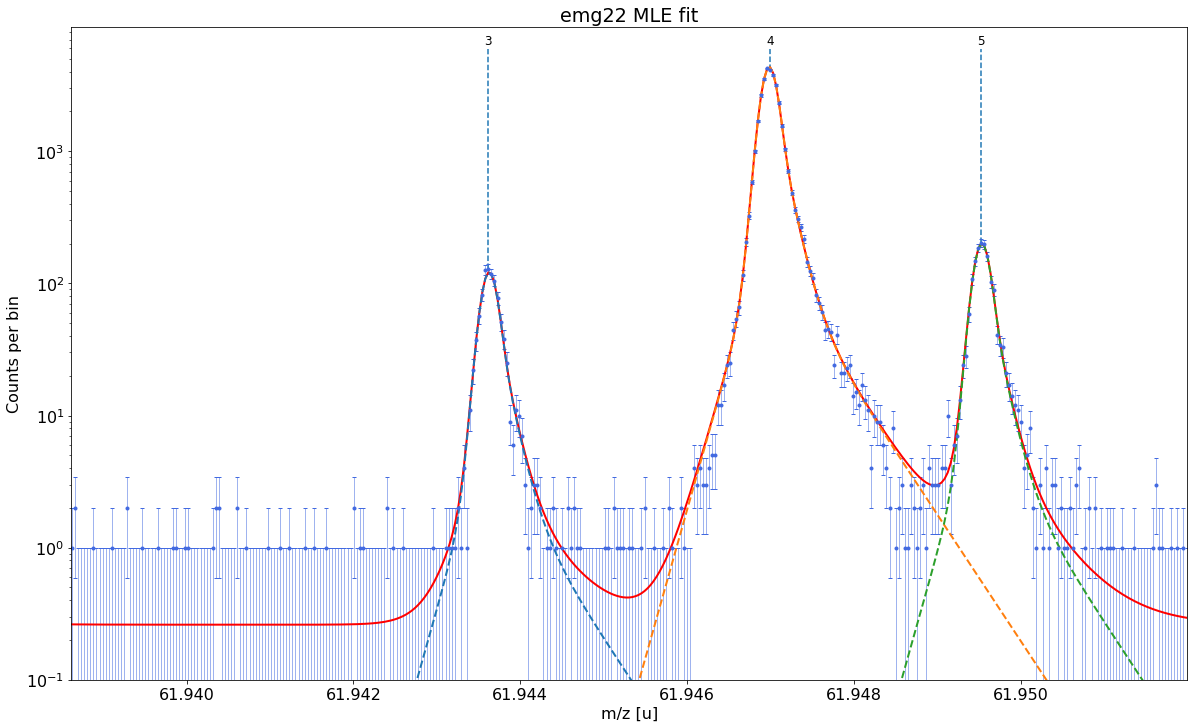

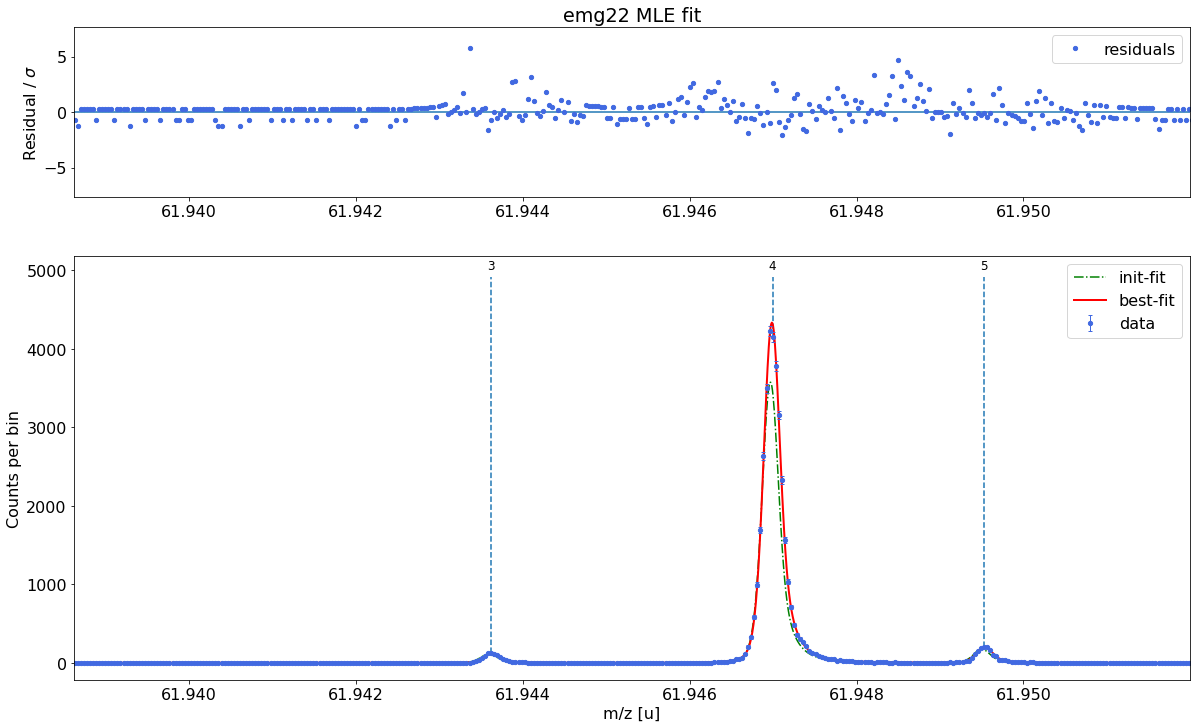

In [8]:
spec.plot_fit_zoom(peak_indeces=[3,4]) # zoom to region around peaks 3 and 4 

## Export fit results
Once all peaks have been fitted, the results can be exported to an XLSX Excel file and a separate file with the peak-shape calibration parameters by using the [save_results](modules.rst#emgfit.spectrum.spectrum.save_results) method. The XLSX file contains three sheets: 
1. General properties the spectrum object, e.g. input filename, used version of emgfit and all relevant dependencies, ...   
2. The peak properties table and linear and logarithmic plots of the full spectrum fit.
3. The peak centroid shifts relative to the mass calibrant obtained in the peak-shape uncertainty evaluation. 

In [9]:
spec.save_results('outputs/'+filename+' fitting MLE')

ERROR: File outputs/2019-09-13_004-_006 SUMMED High stats 62Ga fitting MLE.xlsx already exists. No files saved! Choose a different filename or delete the original file and re-try.


**That's it! In principle we're be done with the fitting at this point.**  Next we would probably take a look at the output file and proceed with some post-processing in Excel (e.g. combining mass values from different spectra etc.). 

However, since emgfit gives the user a large amount of freedom, there's are a number of things that could have been done differently depending on your preferences. So here is some possible...  





## Alternative procedures:

The above steps represent a full spectrum analysis. However, emgfit gives the user the freedom to take many different routes in processing the spectrum. Some of the possible alternatives are presented in the following: 

### Alternative 1: Performing the mass recalibration separately before the ion-of-interest fits
All steps up to the final peak fit are identical. For breviety here we simply create an exact clone of the above spectrum object:

In [10]:
import copy
spec2 = copy.deepcopy(spec) # create a clone of the spectrum object

#### First obtain the recalibration factor from a fit of the mass calibrant

##### Calibrant fit #####


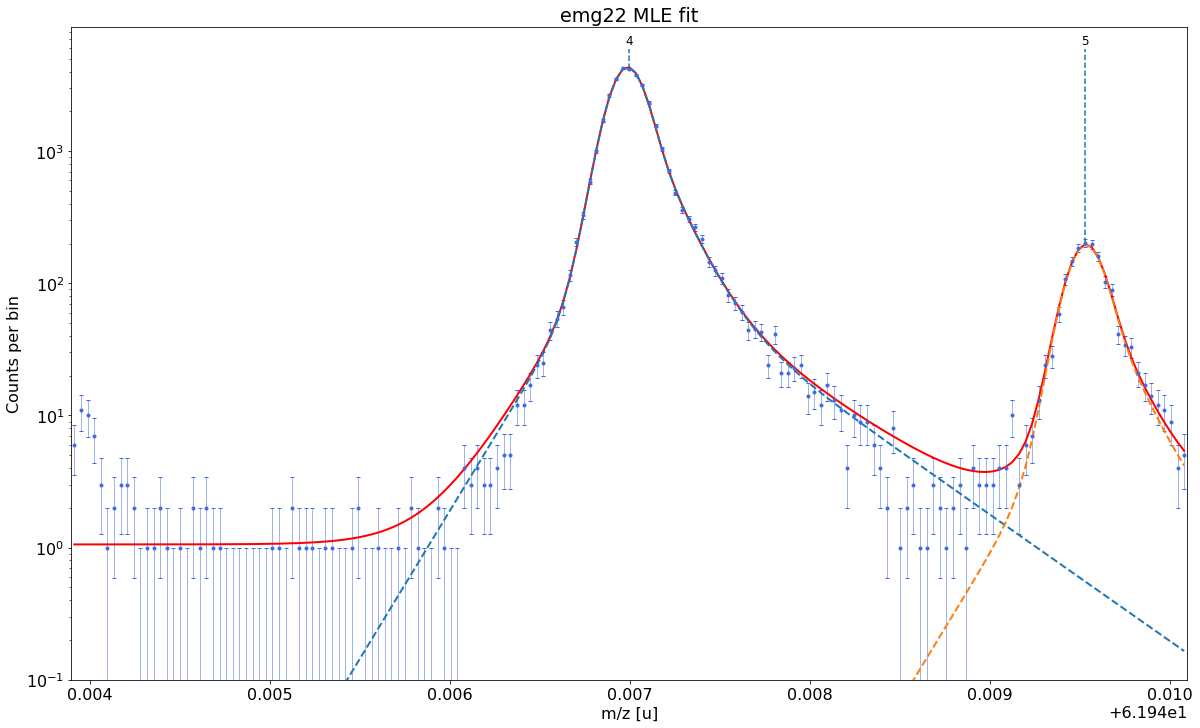

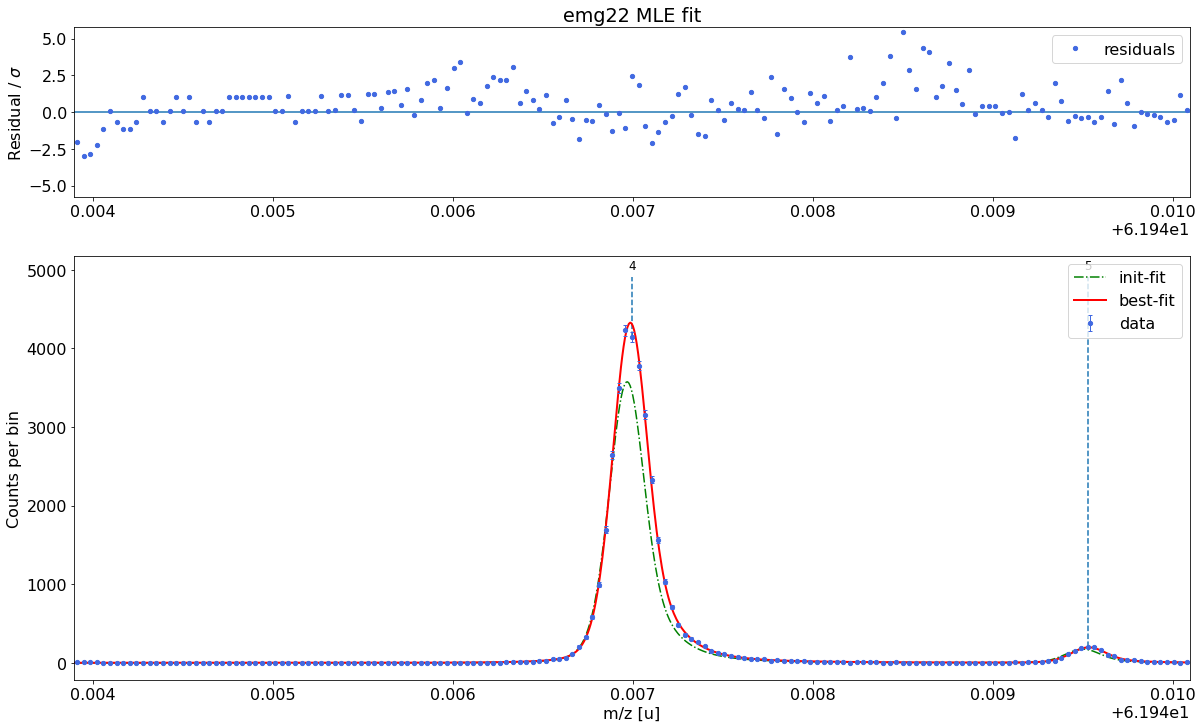


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.2e-08

Recalibration factor:      0.999999689 = 1 -3.11e-07
Relative recalibration error:  1.2e-08 

Determining absolute centroid shifts of mass calibrant.



In [11]:
spec2.fit_calibrant(species_mass_calib='Ti46:O16:-1e')

#### Fit all peaks and use the mass recalibration factor from above to calculate the final mass values

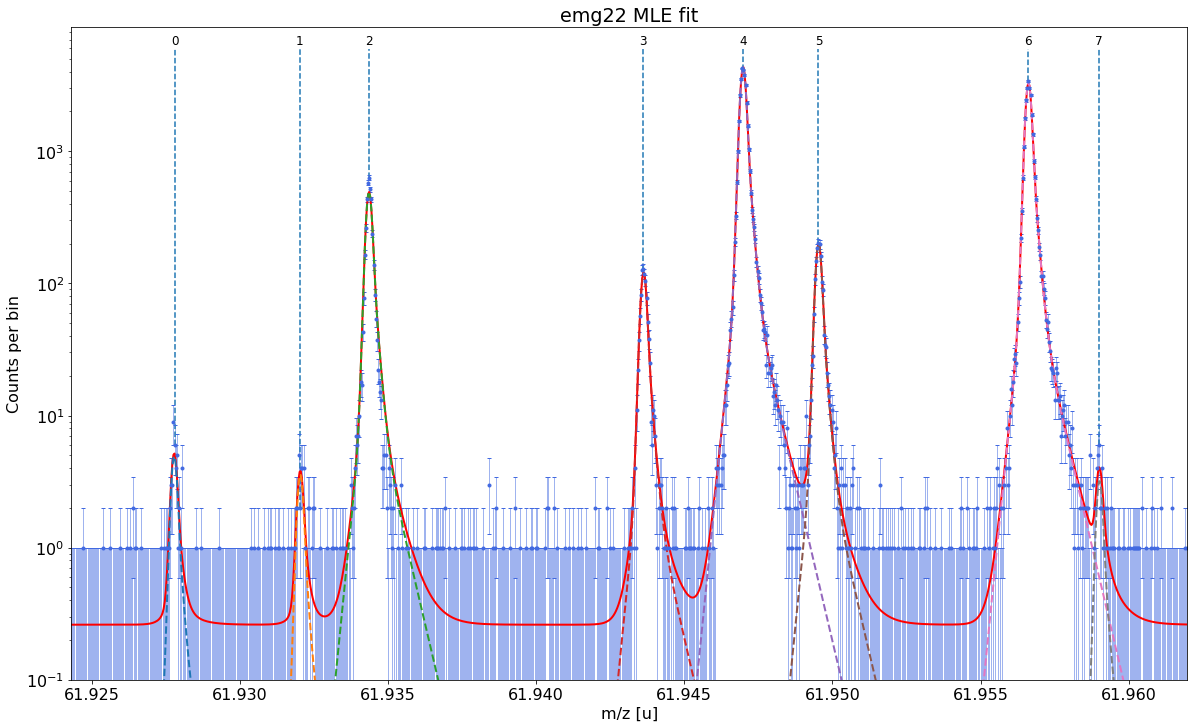

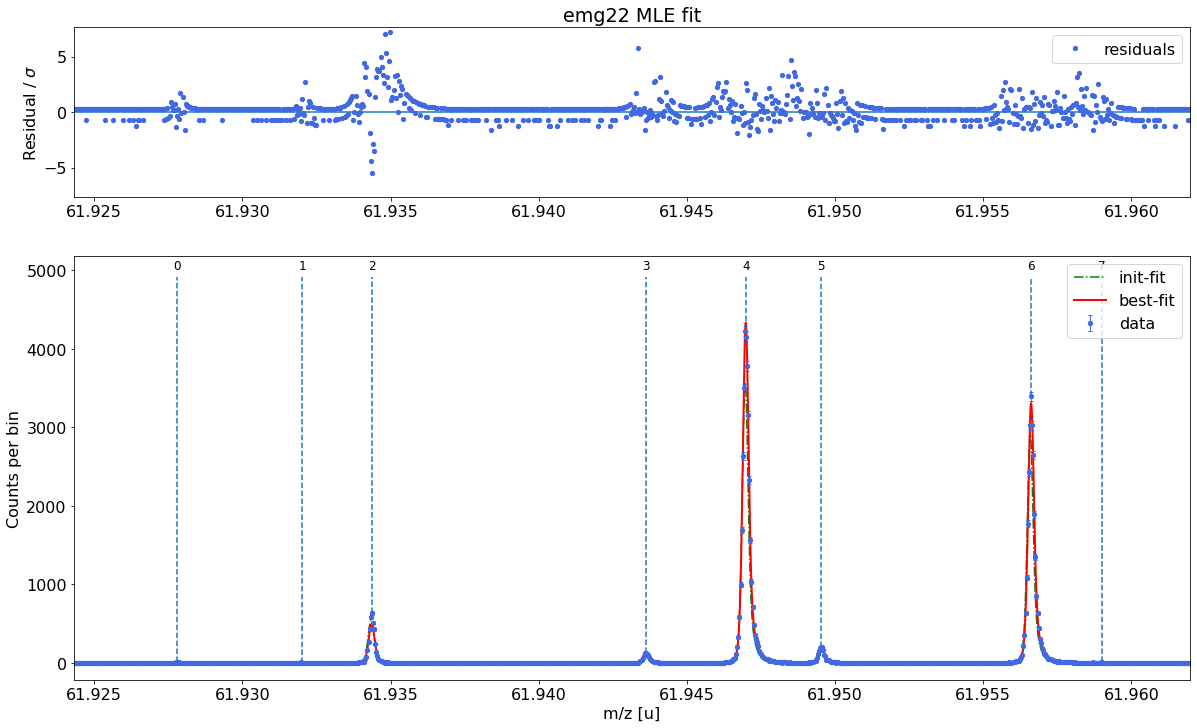


##### Peak-shape uncertainty evaluation #####

All mass shifts below are corrected for the corresponding shifts of the calibrant peak.

Determining absolute centroid shifts of mass calibrant.



Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 0 by -0.200 /  0.184 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 1 by  0.469 / -0.391 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 2 by -0.371 /  0.232 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 3 by -0.021 /  0.026 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 5 by  0.032 / -0.069 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 6 by  0.052 / -0.003 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 7 by  0.228 / -0.189 μu.



Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 0 by -0.443 /  0.407 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 1 by -0.897 /  0.948 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 2 by -0.427 /  0.239 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 3 by -0.148 /  0.158 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 5 by -0.152 /  0.266 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 6 by -0.081 /  0.084 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 7 by -1.583 /  1.728 μu.



Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 0 by  0.534 / -0.505 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 1 by  0.322 / -0.226 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 2 by  0.228 / -0.418 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 3 by  0.286 / -0.194 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 5 by  0.244 / -0.155 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 6 by  0.086 / -0.049 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 7 by  0.460 / -0.330 μu.



Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 0 by -0.682 /  0.715 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 1 by  0.226 / -0.195 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 2 by -0.501 /  0.369 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 3 by -0.070 /  0.151 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 5 by -0.125 /  0.098 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 6 by -0.030 / -0.021 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 7 by -0.724 /  0.721 μu.



Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 0 by -0.241 /  0.260 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 1 by -0.134 /  0.139 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 2 by -0.254 /  0.043 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 3 by -0.116 /  0.206 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 5 by -0.048 /  0.171 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 6 by -0.029 /  0.068 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 7 by  0.215 / -0.015 μu.



Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 0 by -0.029 / -0.017 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 1 by -0.194 /  0.103 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 2 by -0.150 / -0.023 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 3 by -0.086 /  0.088 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 5 by -0.207 /  0.195 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 6 by  0.043 /  0.003 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 7 by -3.030 /  2.429 μu.



Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 0 by  0.020 / -0.125 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 1 by  0.245 / -0.349 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 2 by  0.191 / -0.497 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 3 by  0.145 / -0.177 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 5 by  0.042 /  0.007 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 6 by -0.008 /  0.014 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 7 by  0.444 / -0.461 μu.



Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 0 by -0.066 /  0.074 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 1 by  0.330 / -0.326 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 2 by  0.024 / -0.020 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 3 by  0.039 / -0.026 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 5 by  0.382 / -0.444 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 6 by -0.026 /  0.046 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 7 by  1.375 / -6.324 μu.

Relative peak-shape error of peak 0: 1.7e-08
Relative peak-shape error of peak 1: 2e-08
Relative peak-shape error of peak 2: 1.7e-08
Relative peak-shape error of peak 3: 7e-09
Relative peak-shape error of peak 5: 1e-08
Relative peak-shape error of peak 6: 3e-09
Relative peak-shape error of peak 7: 1.18e-07


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,1.22,38.67,6.77,61.927795,3.443261e-07,1.196007e-08,1.710577e-08,3.449581e-07,62.0,-66747.125,19.899039,-0.795
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,MLE,1.22,28.07,5.98,61.932051,4.041159e-07,1.196007e-08,2.017798e-08,4.047961e-07,NaN,NaN,23.352419,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,1.22,3872.82,62.56,61.934369,3.440307e-08,1.196007e-08,1.678873e-08,4.010582e-08,NaN,NaN,2.313765,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,1.22,954.58,31.20,61.943636,6.928509e-08,1.196007e-08,7.462671e-09,7.070473e-08,62.0,-51992.065,4.079672,-5.153
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,1.88,33947.16,184.82,61.946993,1.161771e-08,1.196007e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,1.22,1567.77,40.11,61.949540,5.405842e-08,1.196007e-08,1.048831e-08,5.635034e-08,62.0,-46492.223,3.251732,6.002
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,1.22,25966.02,161.32,61.956622,1.328166e-08,1.196007e-08,2.639794e-09,1.806694e-08,62.0,-39895.693,1.042683,0.578
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,1.22,25.28,6.40,61.959019,4.256470e-07,1.196007e-08,1.177245e-07,4.417889e-07,NaN,NaN,25.497610,NaN


The values for chi-squared as well as the parameter uncertainties and correlations reported by lmfit below should be taken with caution when your MLE fit includes bins with low statistics. For details see Notes section in the spectrum.peakfit() method documentation.


In [12]:
spec2.fit_peaks()

### Alternative 2: Chi-square instead of MLE fitting 
All steps up to the final peak fit are identical. For breviety here we simply create an exact clone of the above spectrum object and re-use the above peak-shape calibration (obtained with chi-square fitting):

Creating synthetic spectra via bootstrap re-sampling and fitting  them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.



Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 8.9947e-09
    reduced chi-square = 1.2850e-09
    Akaike info crit   = -162.848615
    Bayesian info crit = -162.769174
[[Variables]]
    amplitude:  1.4857e-04 +/- 1.2998e-05 (8.75%) (init = 1)
    exponent:  -0.5 (fixed)


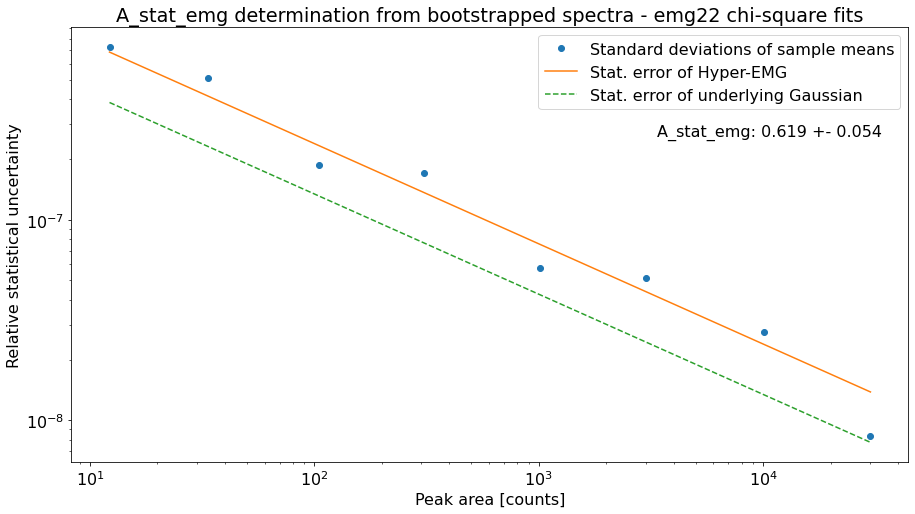

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.619 +- 0.054


In [13]:
import copy
spec_chi_sq = copy.deepcopy(spec) # create a clone of the spectrum object

# Use Pearson's chi-squared statistic for A_stat_emg determination
spec_chi_sq.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,cost_func='chi-square',plot_filename='outputs/'+filename+'_chi-square',N_spectra=10) 

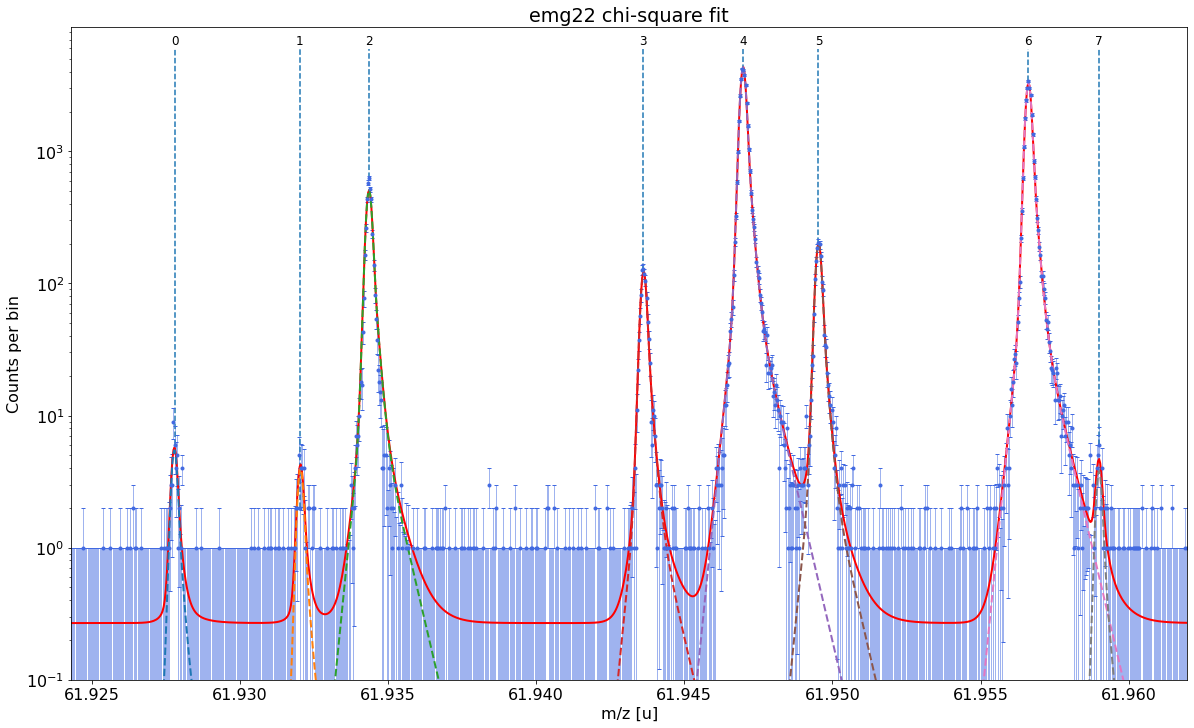

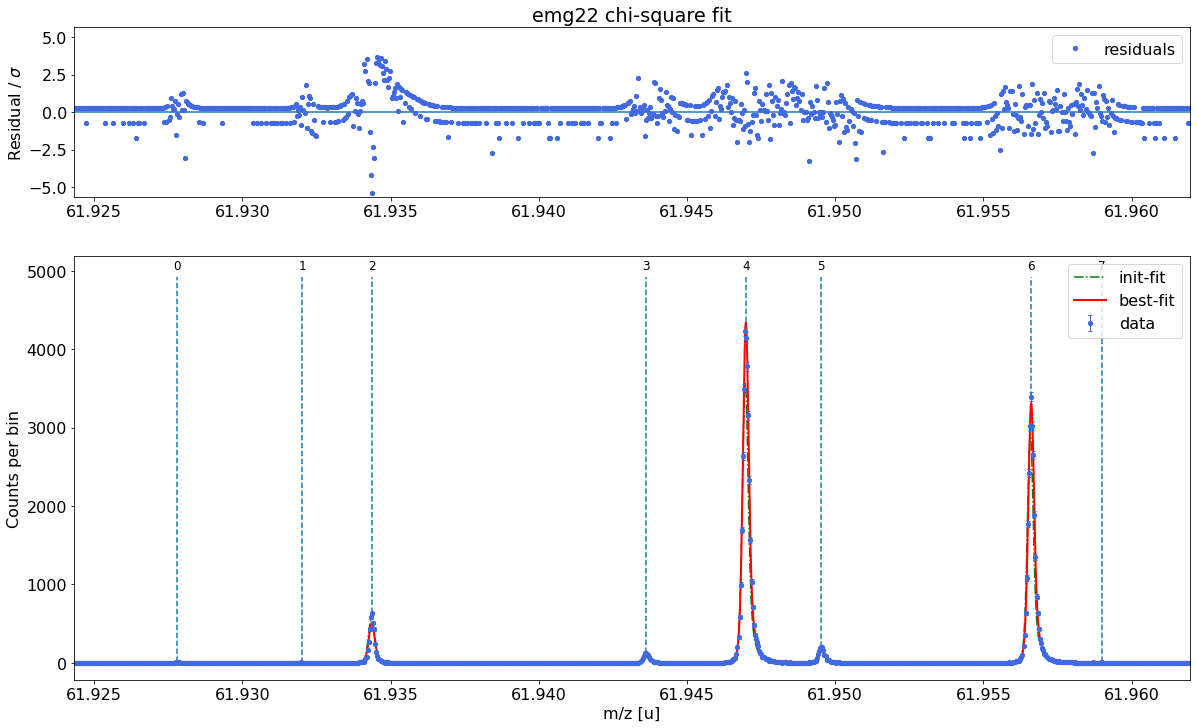


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.3e-08

Recalibration factor:      0.999999689 = 1 -3.11e-07
Relative recalibration error:  1.3e-08 


##### Peak-shape uncertainty evaluation #####

All mass shifts below are corrected for the corresponding shifts of the calibrant peak.

Determining absolute centroid shifts of mass calibrant.



Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 0 by -2.553 / -0.335 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 1 by -0.135 /  0.066 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 2 by -0.384 /  0.272 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 3 by -0.092 /  0.077 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 5 by -0.028 /  0.030 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 6 by  0.010 / -0.011 μu.
Re-fitting with sigma = 8.33e-05 +/- 2.73e-06 shifts peak 7 by -0.678 /  1.590 μu.



Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 0 by -0.907 /  0.870 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 1 by -0.928 /  0.734 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 2 by -0.665 /  0.527 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 3 by -0.203 /  0.180 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 5 by -0.143 /  0.145 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 6 by -0.015 /  0.018 μu.
Re-fitting with theta = 7.30e-01 +/- 2.08e-02 shifts peak 7 by -1.595 /  2.653 μu.



Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 0 by  0.620 / -0.475 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 1 by  0.548 / -0.406 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 2 by  0.342 / -0.302 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 3 by  0.323 / -0.225 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 5 by  0.176 / -0.107 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 6 by  0.018 / -0.015 μu.
Re-fitting with eta_m1 = 9.31e-01 +/- 1.78e-02 shifts peak 7 by  0.628 / -0.509 μu.



Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 0 by -3.304 /  0.435 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 1 by -0.120 /  0.196 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 2 by -0.486 /  0.505 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 3 by -0.226 /  0.224 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 5 by -0.216 /  0.217 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 6 by -0.033 /  0.031 μu.
Re-fitting with tau_m1 = 4.64e-05 +/- 5.07e-06 shifts peak 7 by -1.950 /  2.106 μu.



Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 0 by -0.121 /  0.244 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 1 by -0.268 /  0.340 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 2 by -0.061 /  0.105 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 3 by -0.093 /  0.171 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 5 by  0.006 /  0.048 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 6 by  0.016 / -0.008 μu.
Re-fitting with tau_m2 = 1.94e-04 +/- 2.55e-05 shifts peak 7 by -0.120 /  0.174 μu.



Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 0 by -0.143 /  0.069 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 1 by -0.309 /  0.132 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 2 by -0.327 /  0.191 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 3 by -0.136 /  0.112 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 5 by -0.229 /  0.207 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 6 by  0.018 / -0.015 μu.
Re-fitting with eta_p1 = 8.13e-01 +/- 3.62e-02 shifts peak 7 by -8.185 /  6.416 μu.



Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 0 by  0.153 / -0.285 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 1 by  0.517 / -0.704 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 2 by  0.487 / -0.596 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 3 by  0.168 / -0.207 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 5 by -0.072 /  0.074 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 6 by -0.002 /  0.000 μu.
Re-fitting with tau_p1 = 1.29e-04 +/- 1.18e-05 shifts peak 7 by  0.045 / -0.070 μu.



Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 0 by  0.011 / -2.820 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 1 by -0.050 / -0.131 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 2 by -0.011 / -0.139 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 3 by  0.021 / -0.066 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 5 by  0.476 / -0.625 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 6 by -0.018 /  0.024 μu.
Re-fitting with tau_p2 = 4.54e-04 +/- 5.93e-05 shifts peak 7 by  8.496 / -29.021 μu.

Relative peak-shape error of peak 0: 8.3e-08
Relative peak-shape error of peak 1: 2.3e-08
Relative peak-shape error of peak 2: 1.9e-08
Relative peak-shape error of peak 3: 9e-09
Relative peak-shape error of peak 5: 1.2e-08
Relative peak-shape error of peak 6: 1e-09
Relative peak-shape error of peak 7: 4.91e-07


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,chi-square,0.78,42.98,7.29,61.927802,3.659375e-07,1.330349e-08,8.347710e-08,3.755738e-07,62.0,-66741.279,21.665120,5.051
1,61.932021,Cu62:-1e?,-,NaN,NaN,False,emg22,chi-square,0.78,31.37,6.53,61.932058,4.283049e-07,1.330349e-08,2.250901e-08,4.291023e-07,NaN,NaN,24.754629,NaN
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,chi-square,0.78,4002.37,63.93,61.934370,3.791713e-08,1.330349e-08,1.946408e-08,4.464910e-08,NaN,NaN,2.575874,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,chi-square,0.78,967.82,31.50,61.943636,7.709600e-08,1.330349e-08,8.850163e-09,7.873437e-08,62.0,-51992.161,4.542984,-5.248
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,chi-square,0.78,34052.89,184.77,61.946993,1.299656e-08,1.330349e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,chi-square,0.78,1582.90,40.49,61.949540,6.027830e-08,1.330349e-08,1.198239e-08,6.288111e-08,62.0,-46492.156,3.628594,6.070
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,chi-square,0.78,26004.76,161.51,61.956622,1.487002e-08,1.330349e-08,8.905363e-10,1.997232e-08,62.0,-39895.706,1.152647,0.565
7,61.958997,?,-,NaN,NaN,False,emg22,chi-square,0.78,29.96,7.06,61.959002,4.380771e-07,1.330349e-08,4.905291e-07,6.578049e-07,NaN,NaN,37.964847,NaN


In [14]:
spec_chi_sq.fit_peaks(species_mass_calib='Ti46:O16:-1e',cost_func='chi-square') # use Pearson's chi-squared statistic